# Retail Business Analysis
---

This analysis provides actionable insights to improve sales performance based on comprehensive retail transaction data analysis. 


## Executive Summary

🔹 **Revenue has stalled**: Sales plateaued in 2011 (–1.2% YoY). The issue is not order value, but stagnant customer growth and weakening repeat engagement.

🔹 **Customer base is leaky**: Acquisition was strong (37% new in 2011) but offset by churn (37% lost). Loyal customers (44% of base) drive \~88% of revenue, creating dependency on a small group.

🔹 **Home Decor is the backbone of the product**: Contributes \~40% of revenue and is the main entry funnel, but underconverts (only \~45% loyalty). Kitchen/Food and Beauty are stronger repeat drivers, while seasonal categories (Christmas, Toys) add short-term spikes but poor retention.

🔹 **Sales are highly seasonal**: Revenue peaks in November, driven by Home Decor and Christmas. Stable categories like Kitchen, Garden, and Stationery sustain baseline demand, but seasonal surges fail to convert into long-term buyers.

### Recommendations

1. **Protect and grow Home Decor** as the flagship, while cross-selling into stickier categories (Kitchen/Food, Beauty) to improve repeat conversion.
2. **Close the retention gap** with campaigns that move one-time buyers into repeat customers, supported by a unified **Customer 360 view**.
3. **Balance the product mix** by revitalizing core everyday categories and using seasonal products mainly as acquisition funnels.
4. **Plan for seasonality** with a simple **demand forecasting framework** to align inventory and marketing around peak and off-peak months.

# Objectives & Research Framework

## Problem Statement
The company requires insights to improve sales performance. To do that, understanding product characteristic, customer behavior patterns, and market trend is key to identify growth opportunities in their business operation.

## Business Questions
1. **KPI & Performance Overview**: How has overall revenue, customer base, and order behavior evolved over time?
2. **Customer Growth & Engagement**: What drives customer acquisition, retention, and churn? How engaged are different customer segments?
3. **Product Strategy & Assortment**: Which products or categories drive revenue, repeat conversion, and loyalty? How concentrated is sales contribution across SKUs?
4. **Seasonality & Demand Patterns**: How do sales vary by month/season, and which categories are most affected by seasonality?
5. **Geographic Performance**: Which regions/markets contribute most to sales, and where are the growth opportunities?

## Approach
- **Data Quality Check:** Data loading and preprocessing to avoid noise and sanitize analysis
- **Data Analysis:** Using the defined business question, identify key metric and analyze results
- **Insight Visualization:** Visualize the findings into executive digestable format
- **Insights Summary:** Summarize the opportunity as recommendation for the stakeholders

# Data Quality Check


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Environment Setup Complete")

Environment Setup Complete


In [2]:
# Load the dataset
df = pd.read_csv('datasets/retail_transaction_data.csv')


print("DATASET OVERVIEW")
print("-" * 50)

# Basic dataset information
print(f"Dataset Shape: {df.shape[0]:,} transactions with {df.shape[1]} features")
print(f"Data Period: {df['order_date'].min()} to {df['order_date'].max()}")

# Display sample data
print("\nSample Data:")
df.head()


DATASET OVERVIEW
--------------------------------------------------
Dataset Shape: 1,067,371 transactions with 8 features
Data Period: 2009-12-01 07:45:00 to 2011-12-09 12:50:00

Sample Data:


,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
# Data Quality Assessment
print("DATA QUALITY CHECK")
print("-" * 50)

# Descriptive statistics of the dataset
display(df.describe().round(2))

# Check data types and missing values
quality_summary = pd.DataFrame({
    # 'Column': df.columns,
    'Data_Type': df.dtypes,
    'Missing_Values': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
    'Unique_Values': [df[col].nunique() for col in df.columns]
})

display(quality_summary)

# Check for anomalies
print(f"Negative quantities: {(df['quantity'] < 0).sum():,}")
print(f"Zero/negative prices: {(df['unit_price'] <= 0).sum():,}")
print(f"Missing customer IDs: {df['customer_id'].isnull().sum():,}")


DATA QUALITY CHECK
--------------------------------------------------


,quantity,unit_price,customer_id
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


,Data_Type,Missing_Values,Missing_Percentage,Unique_Values
order_id,object,0,0.00,53628
product_id,object,0,0.00,5305
product_description,object,4382,0.41,5698
quantity,int64,0,0.00,1057
order_date,object,0,0.00,47635
unit_price,float64,0,0.00,2807
customer_id,float64,243007,22.77,5942
country,object,0,0.00,43


Negative quantities: 22,950
Zero/negative prices: 6,207
Missing customer IDs: 243,007


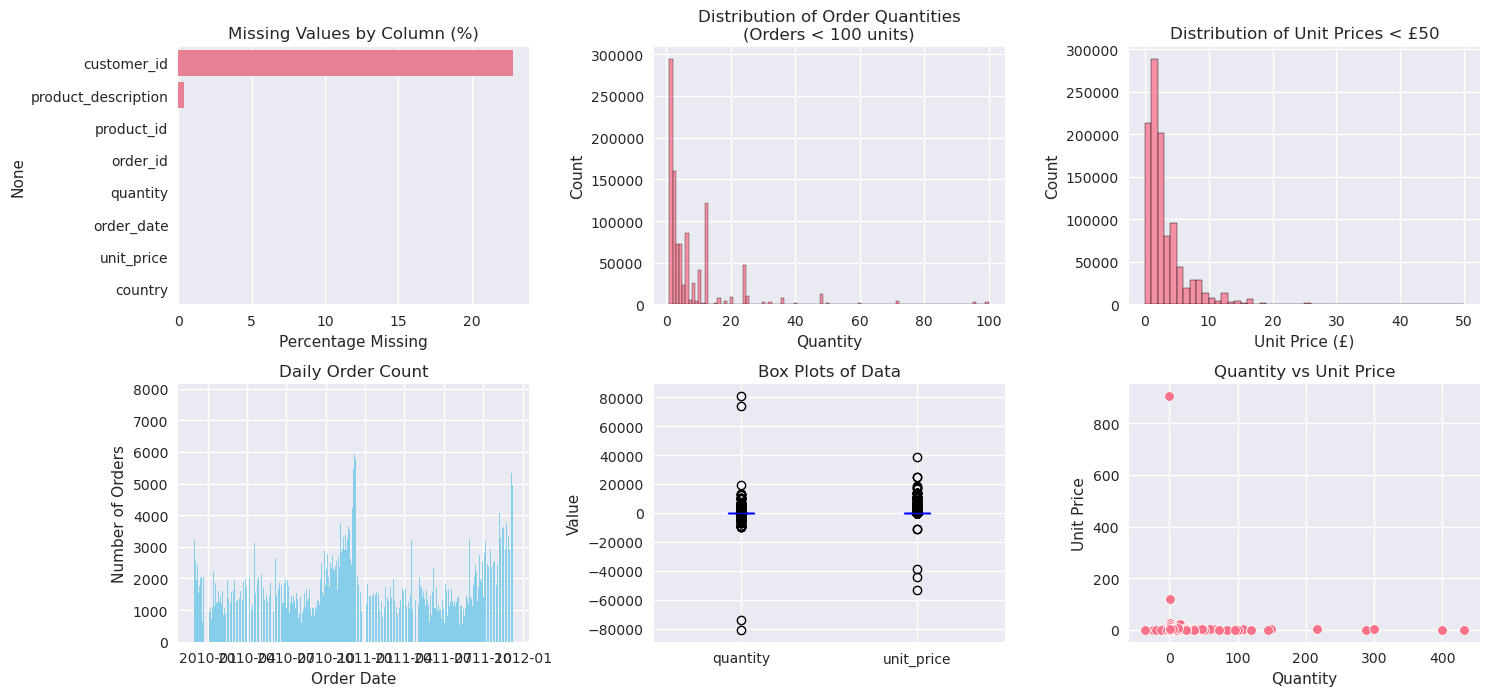


ADDITIONAL QUALITY METRICS
--------------------------------------------------
Price Range: £-53594.36 to £38970.00
Quantity Range: -80995 to 80995 units
Number of orders with quantity > 100: 10,561
Number of products priced > £50: 2,557


In [4]:
# Initial Data quality check visualization

def plot_data_quality(df):
    # Create a figure with subplots for data quality visualization
    plt.figure(figsize=(15, 10))

    # 1. Missing Values Bar Plot
    plt.subplot(3, 3, 1)
    missing_data = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
    sns.barplot(x=missing_data.values, y=missing_data.index)
    plt.title('Missing Values by Column (%)')
    plt.xlabel('Percentage Missing')

    # 2. Distribution of Quantities
    plt.subplot(3, 3, 2)
    sns.histplot(data=df[df['quantity'].between(0, 100)], x='quantity', bins=100)
    plt.title('Distribution of Order Quantities\n(Orders < 100 units)')
    plt.xlabel('Quantity')

    # 3. Distribution of Unit Prices
    plt.subplot(3, 3, 3)
    sns.histplot(data=df[df['unit_price'].between(0, 50)], x='unit_price', bins=50 )
    plt.title('Distribution of Unit Prices < £50')
    plt.xlabel('Unit Price (£)')

    # 4. Daily Order Count Time Series
    plt.subplot(3, 3, 4)
    df_time = df.copy()
    df_time['order_date'] = pd.to_datetime(df_time['order_date'])
    daily_orders = df_time.set_index('order_date').resample('D').size()
    plt.bar(daily_orders.index, daily_orders.values, width=1.0, color='skyblue')
    plt.title('Daily Order Count')
    plt.xlabel('Order Date')
    plt.ylabel('Number of Orders')

    # 5. Box plot of Normalized Data
    plt.subplot(3, 3, 5)
    df.boxplot(column=['quantity', 'unit_price'], color='blue')
    plt.title('Box Plots of Data')
    plt.ylabel('Value')

    # Quantity vs Unit Price scatter
    plt.subplot(3, 3, 6)
    sns.scatterplot(data=df.sample(1000), x='quantity', y='unit_price')
    plt.title('Quantity vs Unit Price')
    plt.xlabel('Quantity')
    plt.ylabel('Unit Price')
    
    plt.tight_layout()
    plt.show()

    # Print additional quality metrics
    print("\nADDITIONAL QUALITY METRICS")
    print("-" * 50)
    print(f"Price Range: £{df['unit_price'].min():.2f} to £{df['unit_price'].max():.2f}")
    print(f"Quantity Range: {df['quantity'].min()} to {df['quantity'].max()} units")
    print(f"Number of orders with quantity > 100: {len(df[df['quantity'] > 100]):,}")
    print(f"Number of products priced > £50: {len(df[df['unit_price'] > 50]):,}")

plot_data_quality(df)

Based on the descriptive statistics and initial exploratory of the dataset, we found that:

1. Invalid data logic like negative quantities and zero prices is present in the dataset.
2. There are missing values in several columns, including customer_id and product_id.
3. The distribution of order quantities is highly skewed, with a small number of orders containing large quantities.
4. Most products have a unit price below £50, but a few outliers are priced significantly higher.
5. Invalid product IDs are found, which do not match the expected format.
6. order_ids starting with "C" is a refund transaction so we need to take out both.
7. Some product description shows non standardize value with questionable data quality, need to take out

So the data cleaning and preprocessing steps that we have to do:

1. Remove invalid transactions with negative quantities, zero prices, or missing customer IDs.
2. Remove missing values in critical columns like customer_id and product_id.
4. Remove product IDs that do not match the expected format.
5. Separate outliers transaction into different table, for different analysis. (anomaly exploration)

In [5]:
# Data Preprocessing and Feature Engineering
print("DATA PREPROCESSING & FEATURE ENGINEERING")
print("-" * 50)

df_clean = df.copy()

# Convert order_date to datetime
df_clean['order_date'] = pd.to_datetime(df_clean['order_date'])

# Create key business metrics
df_clean['total_amount'] = df_clean['quantity'] * df_clean['unit_price']
df_clean['year'] = df_clean['order_date'].dt.year
df_clean['month'] = df_clean['order_date'].dt.month
df_clean['quarter'] = df_clean['order_date'].dt.quarter
df_clean['day_of_week'] = df_clean['order_date'].dt.day_name()
df_clean['month_year'] = df_clean['order_date'].dt.to_period('M')

# Clean data: Remove negative quantities and zero prices (likely returns/errors)
df_clean = df_clean[(df_clean['quantity'] > 0) & (df_clean['unit_price'] > 0) & (df_clean['customer_id'].notna())].copy()
invalid_data_logic_trx = df[(df['quantity'] <= 0) | (df['unit_price'] <= 0) | (df['customer_id'].isna())].shape[0]

# Clean data only keep those with product_id containing 5 numbers at start
df_clean = df_clean[df_clean['product_id'].str.match(r'^\d{5}')]
invalid_product_trx = len(df[~df['product_id'].str.match(r'^\d{5}')])

# Take out product with less than 4 uppercase letters
invalid_product_description_trx = df_clean[df_clean['product_description'].str.count(r'[A-Z]') < 4].shape[0]
df_clean = df_clean[df_clean['product_description'].str.count(r'[A-Z]') >= 4]

# Clean refund data. (data starting with C and order_id with the same order_id without C)
# List all of the refund transaction
refund_transactions = df[df['order_id'].str.startswith('C')]
# take the product_id and customer_id from the refund transaction
refund_products = refund_transactions[['product_id', 'customer_id']]
# filter the same product id and customer_id
df_clean = df_clean[~df_clean[['product_id', 'customer_id']].apply(tuple, 1).isin(refund_products.apply(tuple, 1))]


print(f"Added features: {len(df_clean.columns) - len(df.columns)} {list(set(df_clean.columns) - set(df.columns))}")
print(f"Original dataset: {len(df):,} transactions")
print(f"Number of transactions with invalid product description: {invalid_product_description_trx:,}")
print(f"Number of transactions with invalid data logic: {invalid_data_logic_trx:,}")
print(f"Number of transactions with invalid product_id: {invalid_product_trx:,}")
print(f"Number of refund transactions: {len(refund_transactions):,}")
print(f"Cleaned dataset: {len(df_clean):,} transactions")
print(f"Data removed: {len(df) - len(df_clean):,} transactions ({((len(df) - len(df_clean))/len(df)*100):.1f}%)")

DATA PREPROCESSING & FEATURE ENGINEERING
--------------------------------------------------
Added features: 6 ['year', 'day_of_week', 'total_amount', 'month', 'month_year', 'quarter']
Original dataset: 1,067,371 transactions
Number of transactions with invalid product description: 82
Number of transactions with invalid data logic: 261,822
Number of transactions with invalid product_id: 6,093
Number of refund transactions: 19,494
Cleaned dataset: 757,349 transactions
Data removed: 310,022 transactions (29.0%)


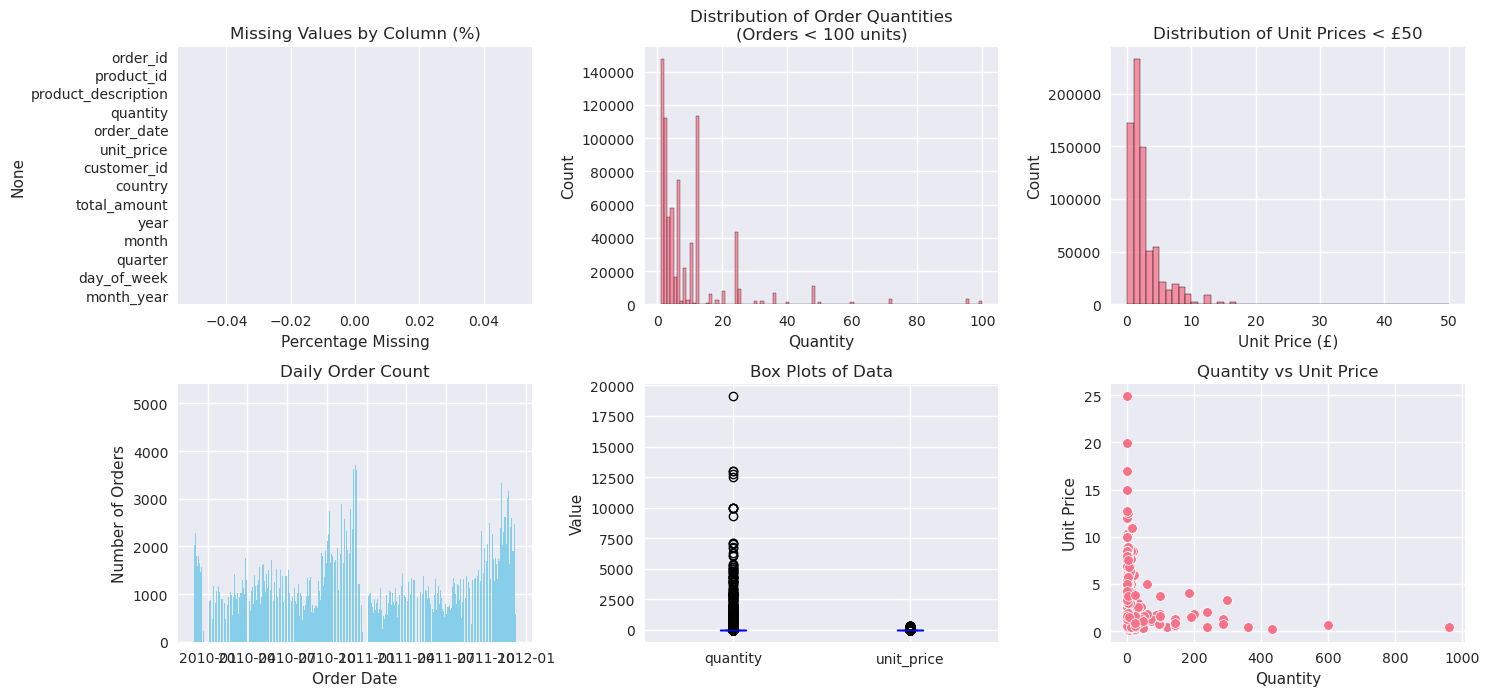


ADDITIONAL QUALITY METRICS
--------------------------------------------------
Price Range: £0.03 to £295.00
Quantity Range: 1 to 19152 units
Number of orders with quantity > 100: 8,325
Number of products priced > £50: 259


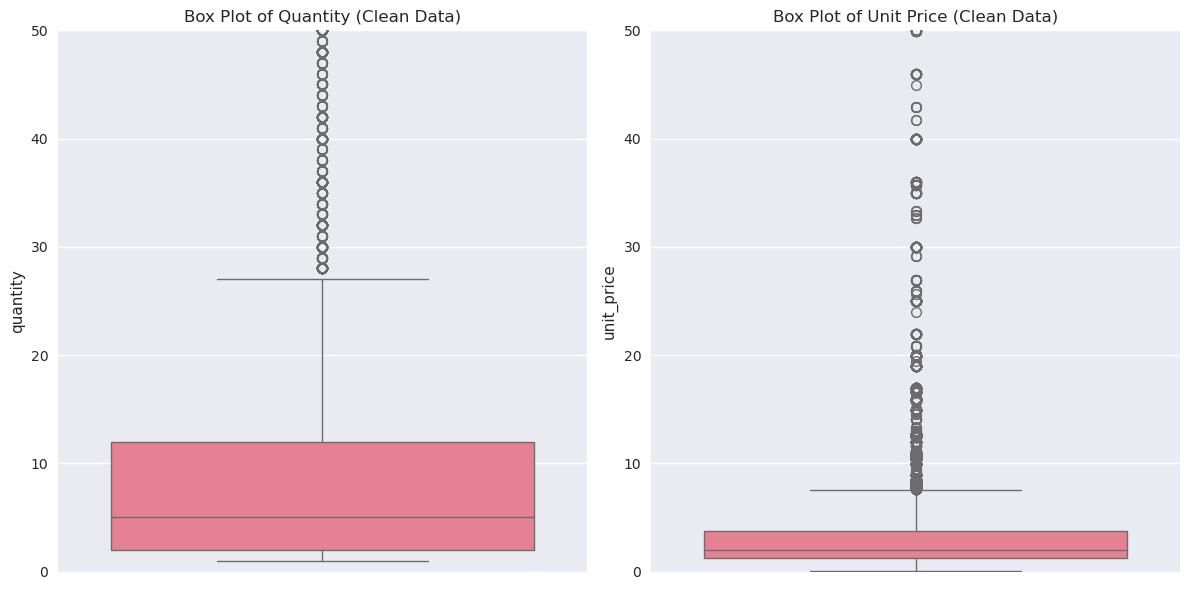

Final clean dataset shape: 757,349 transactions with 14 features


In [6]:
# Final Data quality check visualization
plot_data_quality(df_clean)

# box plot quantity and unit price with y limit = 50
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, y='quantity')
plt.ylim(0, 50)
plt.title('Box Plot of Quantity (Clean Data)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, y='unit_price')
plt.ylim(0, 50)
plt.title('Box Plot of Unit Price (Clean Data)')

plt.tight_layout()
plt.show()

print(f'Final clean dataset shape: {df_clean.shape[0]:,} transactions with {df_clean.shape[1]} features')

The cleaned data makes more reasonable, the quantity and unit price distributions are now more representative of typical pattern (lower unit price correlates with higher quantity sold). The box plot reveal invalid data has been cleaned while we keep retaining reasonable outliers for further analysis.

We need to also create one table for outlier data for further outlier or anomaly analysis. (We might see hidden opportunities behind this data)

In [7]:
# Create normal data without outliers and outlier only data
# Define outlier thresholds using IQR method
Q1_quantity = df_clean['quantity'].quantile(0.25)
Q3_quantity = df_clean['quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity
quantity_lower = Q1_quantity - 1.5 * IQR_quantity
quantity_upper = Q3_quantity + 3 * IQR_quantity

Q1_price = df_clean['unit_price'].quantile(0.25)
Q3_price = df_clean['unit_price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
price_lower = Q1_price - 1.5 * IQR_price
price_upper = Q3_price + 1.5 * IQR_price

# Create outliers only dataset
df_outliers = df_clean[ 
    (df_clean['quantity'] > quantity_upper) 
].copy()

# df_normal data without outliers
df_normal = df_clean[
    (df_clean['quantity'] < quantity_upper) 
].copy()

print("Created outlier only datasets")

Created outlier only datasets


In [8]:
# Outlier Analysis: Focus on df_outliers only
print("Outlier Analysis (df_outliers)")
print("-" * 40)

# Show basic info
print(f"Total outlier transactions: {len(df_outliers):,} ({len(df_outliers)/len(df)*100:.2f}%)")

# Price outliers
print(f"Unit price range: £{df_outliers['unit_price'].min():.2f} - £{df_outliers['unit_price'].max():.2f}")

# Quantity outliers
print(f"Quantity range: {df_outliers['quantity'].min()} - {df_outliers['quantity'].max()}")

# Transaction value outliers
print(f"Total amount range: £{df_outliers['total_amount'].min():.2f} - £{df_outliers['total_amount'].max():.2f}")

# Outlier summary by product and customer
outlier_products = df_outliers['product_id'].nunique()
outlier_customers = df_outliers['customer_id'].nunique()
print(f"Percentage Unique products in outliers: {outlier_products/df['product_id'].nunique()*100:.2f}%")
print(f"Percentage Unique customers in outliers: {outlier_customers/df['customer_id'].nunique()*100:.2f}%")

# Show top 5 outlier transactions by value
print("\nTop 5 outlier transactions by value:")
display(df_outliers.sort_values('total_amount', ascending=False).head(5))


Outlier Analysis (df_outliers)
----------------------------------------
Total outlier transactions: 32,088 (3.01%)
Unit price range: £0.03 - £32.69
Quantity range: 43 - 19152
Total amount range: £2.08 - £8925.00


Percentage Unique products in outliers: 53.67%
Percentage Unique customers in outliers: 48.79%

Top 5 outlier transactions by value:


,order_id,product_id,product_description,quantity,order_date,unit_price,customer_id,country,total_amount,year,month,quarter,day_of_week,month_year
228042,511465,15044A,PINK PAPER PARASOL,3500,2010-06-08 12:59:00,2.55,18008.0,United Kingdom,8925.00,2010,6,2,Tuesday,2010-06
873786,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72,2011,9,3,Tuesday,2011-09
947062,573003,23084,RABBIT NIGHT LIGHT,2400,2011-10-27 12:11:00,2.08,14646.0,Netherlands,4992.00,2011,10,4,Thursday,2011-10
358821,524181,21622,VINTAGE UNION JACK CUSHION COVER,648,2010-09-27 16:59:00,6.89,17450.0,United Kingdom,4464.72,2010,9,3,Monday,2010-09
769880,558526,23173,REGENCY TEAPOT ROSES,540,2011-06-30 11:01:00,8.15,17949.0,United Kingdom,4401.00,2011,6,2,Thursday,2011-06


- The percentage of unique products and customers in the outlier group is significant.
- Outliers make up only about 3% of all transactions, but they involve a wide range of products and customers.
- This suggests that outlier transactions may reveal unique patterns or behaviors not seen in the main dataset.

# Business Performance Analysis

## Revenue Performance Overview

In this step, we will analyze the KPI of the business over the selected period. This will involve examining key metrics such as total revenue, transaction volume, and customer engagement levels to identify trends and areas for improvement.

In [9]:
# Key Performance Indicators (KPIs)

print("KEY PERFORMANCE INDICATORS (KPIs)")
print("-" * 50)


# Calculate KPIs
total_revenue = df_clean['total_amount'].sum()
total_transactions = len(df_clean)
unique_customers = df_clean['customer_id'].nunique()
unique_products = df_clean['product_id'].nunique()
avg_order_value = df_clean.groupby('order_id')['total_amount'].sum().mean()
avg_unique_items_per_transaction = df_clean.groupby('order_id')['product_id'].nunique().mean()
avg_revenue_per_customer = df_clean.groupby('customer_id')['total_amount'].sum().mean()
avg_number_of_orders = df_clean.groupby('customer_id')['order_id'].nunique().mean()

# Print date between
print(f"Date Range: {df_clean['order_date'].min().date()} to {df_clean['order_date'].max().date()}")

# Display KPIs 
kpi_data = {
    'Metric': [
        'Total Revenue',
        'Total Transactions', 
        'Unique Customers',
        'Unique Products',
        'Average Order Value',
        'Average Unique Items per Transaction',
        'Average Revenue per Customer',
        'Average Number of Orders per Customer'
    ],
    'Value': [
        f"${total_revenue:,.2f}",
        f"{total_transactions:,}",
        f"{unique_customers:,}",
        f"{unique_products:,}",
        f"${avg_order_value:.2f}",
        f"{avg_unique_items_per_transaction:.2f}",
        f"${avg_revenue_per_customer:.2f}",
        f"{avg_number_of_orders:.2f}"
    ],
    'Business_Impact': [
        'Primary revenue driver',
        'Volume indicator',
        'Market reach',
        'Product diversity',
        'Customer spending behavior',
        'Cross Sell Effectiveness',
        'Value per Customer',
        'Order Frequency'
    ]
}

kpi_df = pd.DataFrame(kpi_data)
display(kpi_df)

# Key Performance Indicators (KPIs) - Yearly Comparison
# This section calculates and displays KPIs for each year to compare fiscal year performance.

print("KEY PERFORMANCE INDICATORS (KPIs) - YoY Performance (November 2011)")
print("-" * 70)

# List to store yearly KPI data
yearly_kpis = []

# only use relevant date and year
df_filtered = df_clean[(df_clean['month'] >= 1) & (df_clean['month'] <= 11) & (df_clean['year'].isin([2010, 2011]))]

# Loop through each year in the cleaned data
for year in sorted(df_filtered['year'].unique()):
    df_year = df_filtered[df_filtered['year'] == year]
    total_revenue = df_year['total_amount'].sum()
    total_transactions = len(df_year)
    unique_customers = df_year['customer_id'].nunique()
    unique_products = df_year['product_id'].nunique()
    avg_order_value = df_year.groupby('order_id')['total_amount'].sum().mean()
    avg_unique_items_per_transaction = df_year.groupby('order_id')['product_id'].nunique().mean()
    avg_revenue_per_customer = df_year.groupby('customer_id')['total_amount'].sum().mean()
    avg_number_of_orders = df_year.groupby('customer_id')['order_id'].nunique().mean()
    
    yearly_kpis.append({
        'Year': year,
        'Total Revenue': total_revenue,
        'Total Transactions': total_transactions,
        'Unique Customers': unique_customers,
        'Unique Products': unique_products,
        'Average Order Value': avg_order_value,
        'Average Unique Items per Transaction': avg_unique_items_per_transaction,
        'Average Revenue per Customer': avg_revenue_per_customer,
        'Average Number of Orders per Customer': avg_number_of_orders
    })

# Create DataFrame for yearly KPIs
kpi_yearly_df = pd.DataFrame(yearly_kpis)

# Format values for display
kpi_yearly_df_display = kpi_yearly_df.copy()
kpi_yearly_df_display['Total Revenue'] = kpi_yearly_df_display['Total Revenue'].apply(lambda x: f"${x:,.2f}")
kpi_yearly_df_display['Total Transactions'] = kpi_yearly_df_display['Total Transactions'].apply(lambda x: f"{x:,}")
kpi_yearly_df_display['Unique Customers'] = kpi_yearly_df_display['Unique Customers'].apply(lambda x: f"{x:,}")
kpi_yearly_df_display['Unique Products'] = kpi_yearly_df_display['Unique Products'].apply(lambda x: f"{x:,}")
kpi_yearly_df_display['Average Order Value'] = kpi_yearly_df_display['Average Order Value'].apply(lambda x: f"${x:.2f}")
kpi_yearly_df_display['Average Unique Items per Transaction'] = kpi_yearly_df_display['Average Unique Items per Transaction'].apply(lambda x: f"{x:.2f}")
kpi_yearly_df_display['Average Revenue per Customer'] = kpi_yearly_df_display['Average Revenue per Customer'].apply(lambda x: f"${x:.2f}")
kpi_yearly_df_display['Average Number of Orders per Customer'] = kpi_yearly_df_display['Average Number of Orders per Customer'].apply(lambda x: f"{x:.2f}")

display(kpi_yearly_df_display)

# See 2010 - 2011 performance by comparing the same month january - november



KEY PERFORMANCE INDICATORS (KPIs)
--------------------------------------------------
Date Range: 2009-12-01 to 2011-12-09


,Metric,Value,Business_Impact
0,Total Revenue,"$14,891,236.64",Primary revenue driver
1,Total Transactions,"757,349",Volume indicator
2,Unique Customers,"5,819",Market reach
3,Unique Products,"4,604",Product diversity
4,Average Order Value,$419.47,Customer spending behavior
5,Average Unique Items per Transaction,20.35,Cross Sell Effectiveness
6,Average Revenue per Customer,$2559.07,Value per Customer
7,Average Number of Orders per Customer,6.10,Order Frequency


KEY PERFORMANCE INDICATORS (KPIs) - YoY Performance (November 2011)
----------------------------------------------------------------------


,Year,Total Revenue,Total Transactions,Unique Customers,Unique Products,Average Order Value,Average Unique Items per Transaction,Average Revenue per Customer,Average Number of Orders per Customer
0,2010,"$6,656,431.27","340,173","4,098","3,864",$411.91,20.38,$1624.31,3.94
1,2011,"$6,576,989.56","333,923","4,139","3,560",$416.77,20.64,$1589.03,3.81


Based on the KPI performance between 2010 and 2011, we found that:

1. **Revenue performance is stagnant.**
   Total revenue slipped slightly from **\$6.65M to \$6.57M (–1.2%)**, with transactions also declining by **1.8%**. This indicates that topline growth has stalled, with fewer orders placed overall.

2. **Customer base is not expanding.**
   Unique customers only increased marginally (**4,098 → 4,139**), showing that the company is essentially selling to the same pool of buyers. This lack of new acquisition limits growth potential.

3. **Product variety is shrinking.**
   Unique products sold declined from **3,864 to 3,560 (–7.9%)**, reducing assortment breadth. This contraction directly impacts cross-sell opportunities and gives customers fewer reasons to engage.

4. **Customer value is weakening.**
   Average revenue per customer dropped from **\$1,624 to \$1,589**, driven by a fall in order frequency (**3.94 → 3.81 orders per customer**). Although average order value ticked up slightly (**+\$5**), it was not enough to offset the decline in repeat purchases.


The data shows that growth is not constrained by order size , in fact, customers are spending slightly more per transaction. Instead, revenue is stagnant because **we are not acquiring new customers, our product range has contracted, and existing customers are buying less frequently.**

Having identified the areas of concern in revenue performance, the next step is to translate these findings into actionable directions for the business. Our focus will shift toward three strategic pillars:

1. Customer Growth & Engagement: The flat revenue in 2011 reflects stalled customer acquisition and fewer repeat purchases. We will examine where growth opportunities exist across segments and how to re-engage existing buyers to lift transaction frequency and recover the drop in average revenue per customer.

2. Product Analysis: The 8% decline in unique products sold reduced opportunities for cross-sell and weakened customer retention. Our analysis will focus on identifying which products lost traction and how refreshing the assortment—while reinforcing top performers—can restore momentum.

3. Seasonality & Demand Alignment: With stagnant number of orders, we need to better understand the underlying demand drivers and seasonal trends. This will involve analyzing historical sales data to identify patterns and adjust our inventory and marketing strategies accordingly.

# Customer Growth & Engagement Analysis

Understanding the drivers behind customer acquisition and repeat purchase behavior is critical to reigniting growth. In this section, we segment customers, analyze new vs. repeat revenue, and assess order frequency and revenue concentration to identify actionable opportunities.

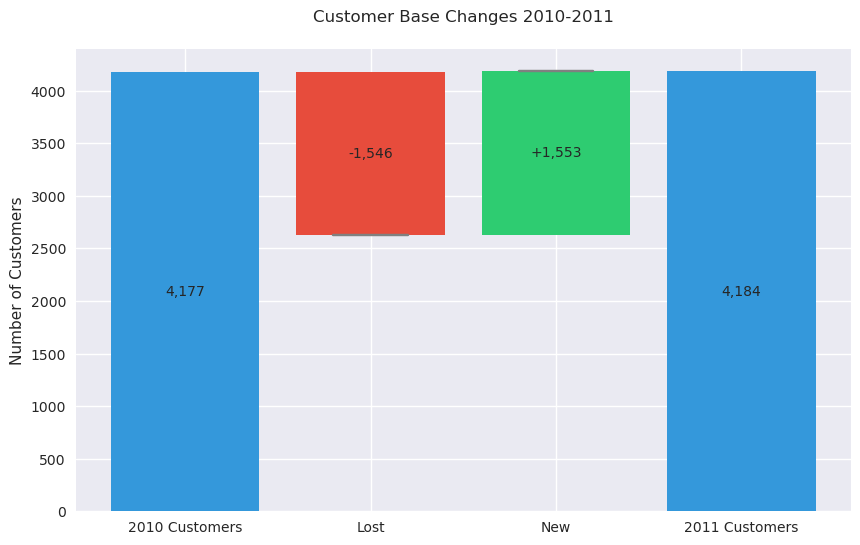

Number of retained customers: 2,631 (62.99%)
Number of lost customers: 1,546 (37.01%)
Number of new customers: 1,553 (37.12%)
Number of 2011 customers: 4,184


In [10]:
# Customer Waterfall Analysis 2010-2011
customers_2010 = df_clean[df_clean['year'] == 2010]['customer_id'].unique()
customers_2011 = df_clean[df_clean['year'] == 2011]['customer_id'].unique()

retained = len(np.intersect1d(customers_2010, customers_2011))
lost = len(customers_2010) - retained 
new = len(customers_2011) - retained

# Create waterfall data
labels = ['2010 Customers', 'Lost', 'New', '2011 Customers']
values = [len(customers_2010), -lost, new, len(customers_2011)]
colors = ['#3498db', '#e74c3c', '#2ecc71', '#3498db']#2ecc71

# Create waterfall plot
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate cumulative positions
cumsum = np.cumsum(values)
start = cumsum - values

# Create bars
for i in range(len(values)):
    if i == 0:  # First total bar
        ax.bar(labels[i], values[i], color=colors[i])
    elif i == len(values)-1:  # Last total bar
        ax.bar(labels[i], values[i], bottom=0, color=colors[i])  # Start from 0
    else:  # Waterfall bars
        ax.bar(labels[i], values[i], bottom=start[i], color=colors[i])
        
# Add connecting lines between bars
for i in range(len(values)-1):
    if i != 0:  # Skip first connection
        ax.plot([i-0.2, i+0.2], [cumsum[i], cumsum[i]], color='gray', linestyle='-')

# Customize plot
plt.title('Customer Base Changes 2010-2011', pad=20)
plt.ylabel('Number of Customers')

# Add value labels on bars
for i in range(len(values)):
    if values[i] >= 0:
        label_pos = values[i]/2 if i == len(values)-1 else start[i] + values[i]/2
        label = f'+{values[i]:,.0f}' if i == 2 else f'{values[i]:,.0f}'
    else:
        label_pos = start[i] + values[i]/2
        label = f'{values[i]:,.0f}'
    
    ax.text(i, label_pos, label, ha='center', va='center')

plt.show()

# number of retained customers
print(f"Number of retained customers: {retained:,.0f} ({(retained/len(customers_2010))*100:.2f}%)")
# number of lost customers
print(f"Number of lost customers: {lost:,.0f} ({(lost/len(customers_2010))*100:.2f}%)")
# number of new customers
print(f"Number of new customers: {new:,.0f} ({(new/len(customers_2011))*100:.2f}%)")
# number of 2011 customers
print(f"Number of 2011 customers: {len(customers_2011):,.0f}")


1. **High Acquisition, But Offset by Losses**
- The company added 1,553 new customers (37% of the 2011 base), indicating strong acquisition capability. However, this was almost completely offset by 1,546 customers lost from the 2010 base (37%), leaving net growth flat.

2. **Large Churn Rate**
- Only 63% of 2010 customers were retained into 2011. With nearly 4 in 10 customers churning each year, acquisition alone cannot sustain growth without stronger retention.

Our stagnant customer base was not due to weak acquisition (new customer inflow was strong) but because losses were high. Growth stalled because the business is running in place. The key opportunity lies in strengthening retention strategies to protect acquired customers

<Figure size 1200x600 with 0 Axes>

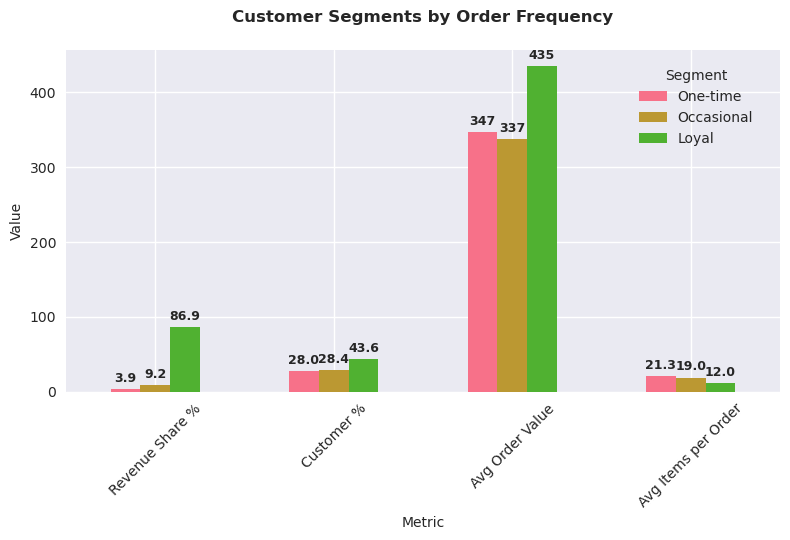


Order Frequency Segment Metrics:
--------------------------------------------------
                   Revenue Share %  Customer %  Avg Order Value  \
frequency_segment                                                 
One-time                       3.9        28.0           347.41   
Occasional                     9.2        28.4           337.24   
Loyal                         86.9        43.6           435.33   

                   Avg Items per Order  
frequency_segment                       
One-time                         21.29  
Occasional                       18.98  
Loyal                            12.02  


In [11]:
# limit to 2010 and 2011
df_filtered = df_clean[df_clean['order_date'].dt.year.isin([2010, 2011])]

# Create customer segments based on order frequency
customer_segments = df_filtered.groupby('customer_id').agg({
    'order_id': 'nunique',
    'total_amount': 'sum',
    'product_id': 'nunique'
}).reset_index()

# Order Frequency Segments
customer_segments['frequency_segment'] = pd.cut(
    customer_segments['order_id'],
    bins=[0, 1, 3, float('inf')],
    labels=['One-time', 'Occasional', 'Loyal'],
    right=True
)

# Calculate metrics for each segment type
def get_segment_metrics(segment_col):
        # Revenue share
    revenue_share = customer_segments.groupby(segment_col)['total_amount'].sum()
    revenue_share_pct = (revenue_share / revenue_share.sum() * 100).round(1)
    
    # Customer count
    customer_count = customer_segments[segment_col].value_counts()
    customer_pct = (customer_count / len(customer_segments) * 100).round(1)
    
    # Average order value
    avg_order_value = (revenue_share / customer_segments.groupby(segment_col)['order_id'].sum()).round(2)
    
    # Average unique items per order
    avg_items = customer_segments.groupby(segment_col)['product_id'].sum()/customer_segments.groupby(segment_col)['order_id'].sum()   
    
    metrics_df = pd.DataFrame({
        'Revenue Share %': revenue_share_pct,
        'Customer %': customer_pct,
        'Avg Order Value': avg_order_value,
        'Avg Items per Order': avg_items
    })
    
    return metrics_df

# Create single plot with wider dimensions
plt.figure(figsize=(12, 6))

# Plot Order Frequency Segments
freq_metrics = get_segment_metrics('frequency_segment')
freq_metrics_transposed = freq_metrics.transpose()
ax = freq_metrics_transposed.plot(kind='bar')
plt.title('Customer Segments by Order Frequency', pad=20, fontsize=12, fontweight='bold')
plt.ylabel('Value', fontsize=10)
plt.xlabel('Metric', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Segment', loc='upper right', bbox_to_anchor=(0.98, 0.98))

# Add data labels with formatting
for container in ax.containers:
    ax.bar_label(container, fmt=lambda x: f'{x:,.1f}' if x < 100 else f'{x:,.0f}', 
                 padding=3, fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\nOrder Frequency Segment Metrics:")
print("-" * 50)
print(freq_metrics.round(2))


1. **Revenue is Highly Skewed Toward Loyal Customers**
- Loyal buyers (44% of base) generate 87.7% of revenue, while one-time and occasional customers (56% of base) together contribute only 12.3%. This skew shows that growth depends on converting more of the base into loyal repeat customers, as acquisition without retention adds little revenue impact.

2. **Different Purchase Patterns Between Segments**
- Loyal customers spend more per order (~$435) but buy fewer unique items per transaction (11.9 vs ~20 for one-time/occasional). This suggests loyal buyers focus on repeat, possibly bulk purchases of fewer SKUs, while first-time/occasional buyers experiment with more varied baskets.

The opportunity lies in reducing churn among new customers who already show strong purchase intent (showed by buying more varied product) but lack retention.

CUSTOMER COHORT ANALYSIS
--------------------------------------------------


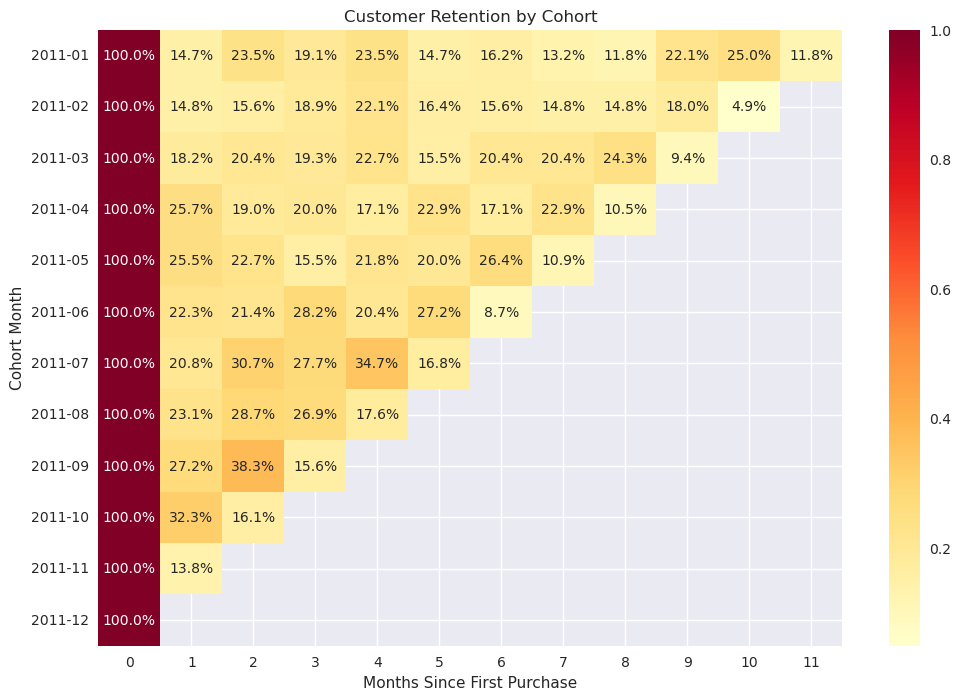

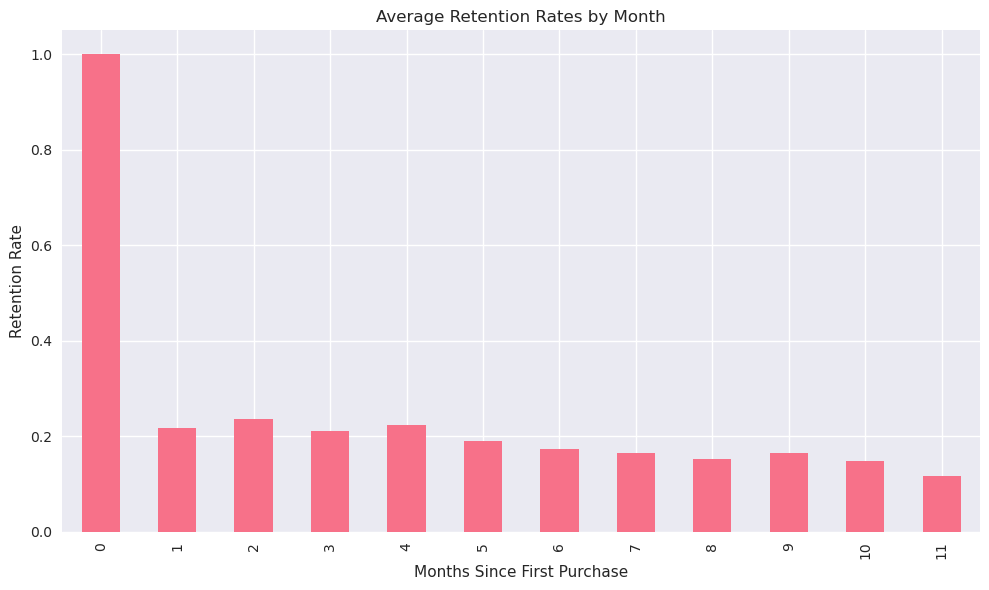

In [12]:
# Cohort Analysis
print("CUSTOMER COHORT ANALYSIS")
print("-" * 50)

# FIXED: Calculate true first purchase month using ALL data first
df_temp = df_normal.copy()
df_temp['order_period'] = df_temp['order_date'].dt.to_period('M')
customer_first_purchase = df_temp.groupby('customer_id')['order_period'].min()

# Now filter to your desired time period
df_filtered = df_normal[df_normal['order_date'].dt.year.isin([2011])]

# Create cohort data
df_cohort = df_filtered.copy()
df_cohort['order_month'] = df_cohort['order_date'].dt.to_period('M')

# Map the true first purchase month (calculated from all data)
df_cohort['cohort_month'] = df_cohort['customer_id'].map(customer_first_purchase)

# Calculate months since first purchase
def get_month_diff(x, y):
    return (x.year - y.year) * 12 + (x.month - y.month)

df_cohort['months_since_first'] = df_cohort.apply(
    lambda x: get_month_diff(x['order_month'], x['cohort_month']), axis=1)

# Retention Analysis
cohort_data = df_cohort.groupby(['cohort_month', 'months_since_first'])['customer_id'].nunique()
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohort_month', 
                                 columns='months_since_first',
                                 values='customer_id')

# filter only data with start month 2011
cohort_counts = cohort_counts[cohort_counts.index.year == 2011]

# only show 12 months since first purchase in the visualizations
cohort_counts = cohort_counts.iloc[:, :12]

# Calculate retention rates
cohort_sizes = cohort_counts[0]
retention_rates = cohort_counts.divide(cohort_sizes, axis=0)

# Plot retention heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(retention_rates.round(3), 
            annot=True, 
            fmt='.1%',
            cmap='YlOrRd')
plt.title('Customer Retention by Cohort')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

# # Display average retention rates by month
# print("\nAverage Retention Rates by Month:")
# print("-" * 30)
avg_retention = retention_rates.mean()
# for month in avg_retention.index:
#     print(f"Month {month}: {avg_retention[month]:.1%}")
    
# visualize retention rates by month
plt.figure(figsize=(10, 6))
avg_retention.plot(kind='bar')
plt.title('Average Retention Rates by Month')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Retention Rate')
plt.tight_layout()
plt.show()


The business is highly leaky: new customer acquisition is strong, but most buyers churn immediately after the first purchase. Retention falls from 100% (Month 0) to just ~22% in Month 1. By Month 6, only ~17% remain active, and by Month 11, just ~12% of the original cohort is still buying. 

But we can see interesting pattern where these customer usually come back in October - November

Revenue is therefore driven by a relatively small pool of repeat customers, though there is improvement of retention in the last 4 months (August 2011 - October 2011), The decay pattern is consistent.

Potential strategy: 
- **Onboarding & First-Repeat Push**: Focus efforts on converting customers from first to second order, since Month 1 retention is the biggest cliff. Promotions, reminders, or product bundling right after the first purchase could lift conversion.

- **Identify Repeat-Conversion Drivers**: Analyze what loyal customers bought on their first purchase vs. churners. If loyalists buy staples/bulk while one-timers buy novelty items, campaigns can nudge new buyers toward “sticky” product categories.

- **Protect the Core**: With only ~20% of customers sticking around, this group is disproportionately valuable and shown as the main driver of the revenue. Loyalty programs or tailored offers should focus here to extend lifetime value.

CUSTOMER COHORT ANALYSIS - REVENUE PER CUSTOMER
--------------------------------------------------


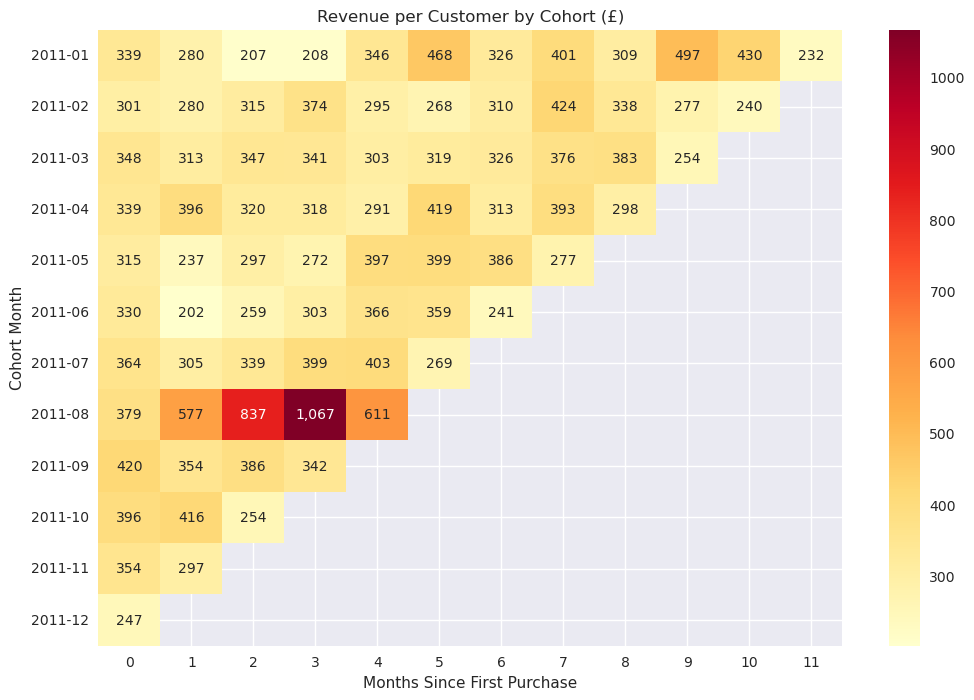

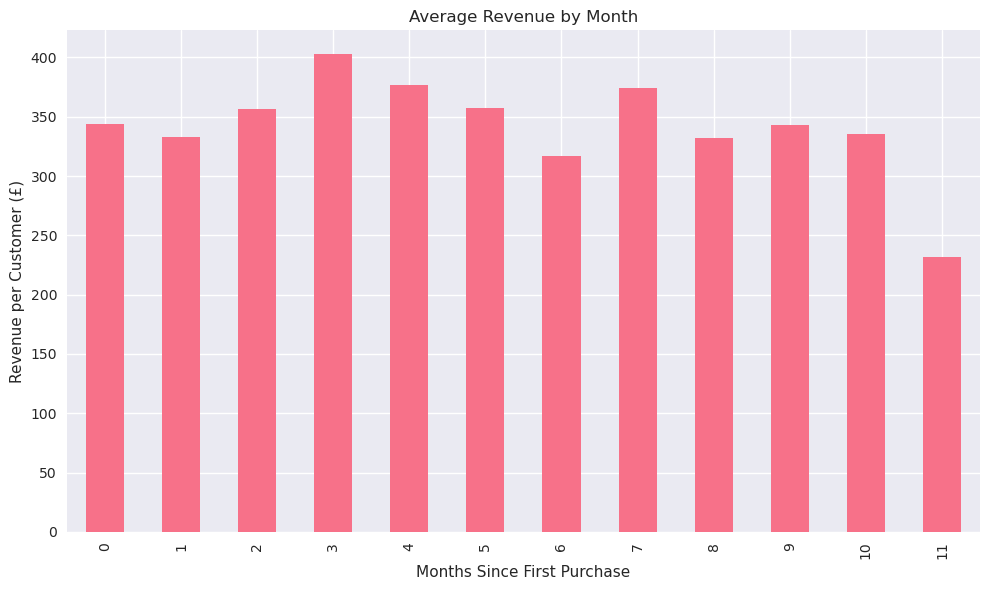

In [13]:
# Cohort Analysis
print("CUSTOMER COHORT ANALYSIS - REVENUE PER CUSTOMER")
print("-" * 50)

# FIXED: Calculate true first purchase month using ALL data first
df_temp = df_normal.copy()
df_temp['order_period'] = df_temp['order_date'].dt.to_period('M')
customer_first_purchase = df_temp.groupby('customer_id')['order_period'].min()

# Now filter to your desired time period
df_filtered = df_normal[df_normal['order_date'].dt.year.isin([2011])]

# Create cohort data
df_cohort = df_filtered.copy()
df_cohort['order_month'] = df_cohort['order_date'].dt.to_period('M')

# Map the true first purchase month (calculated from all data)
df_cohort['cohort_month'] = df_cohort['customer_id'].map(customer_first_purchase)

# Calculate months since first purchase
def get_month_diff(x, y):
    return (x.year - y.year) * 12 + (x.month - y.month)

df_cohort['months_since_first'] = df_cohort.apply(
    lambda x: get_month_diff(x['order_month'], x['cohort_month']), axis=1)

# Revenue Analysis - using per customer values
cohort_data = df_cohort.groupby(['cohort_month', 'months_since_first']).agg({
    'total_amount': 'sum',
    'customer_id': 'nunique'
}).reset_index()

cohort_data['revenue_per_customer'] = cohort_data['total_amount'] / cohort_data['customer_id']

cohort_amounts = cohort_data.pivot(index='cohort_month',
                                 columns='months_since_first', 
                                 values='revenue_per_customer')

# filter only data with start month 2011
cohort_amounts = cohort_amounts[cohort_amounts.index.year == 2011]

# only show 12 months since first purchase in the visualizations
cohort_amounts = cohort_amounts.iloc[:, :12]

# Plot revenue per customer heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cohort_amounts.round(2),
            annot=True,
            fmt=',.0f',
            cmap='YlOrRd')
plt.title('Revenue per Customer by Cohort (£)')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Cohort Month')
plt.show()

# # Display average revenue per customer by month
# print("\nAverage Revenue per Customer by Month:")
# print("-" * 30)
avg_revenue = cohort_amounts.mean()
# for month in avg_revenue.index:
#     print(f"Month {month}: £{avg_revenue[month]:,.2f}")

# visualize average revenue per customer by month
plt.figure(figsize=(10, 6))
avg_revenue.plot(kind='bar')
plt.title('Average Revenue by Month')
plt.xlabel('Months Since First Purchase')
plt.ylabel('Revenue per Customer (£)')
plt.tight_layout()
plt.show()


Cohort revenue patterns show no meaningful uplift in spending. Customers spend roughly the same amount per order over time, suggesting basket size is stable. To note for the product analysis: growth therefore won’t come from pushing higher order values, but focus on identify product to acquire more customers and improving retention to make them stickier.

# Product Analysis

his section examines product category, top product contributions, long-tail performance, and identifies key decliners and gainers to inform assortment strategy.

In [14]:
# Import libraries
from transformers import pipeline
import torch
import json
import time
from typing import Dict, List
import warnings
warnings.filterwarnings('ignore')

# Check if CUDA is available
device = 0 if torch.cuda.is_available() else -1
device_name = "GPU (CUDA)" if torch.cuda.is_available() else "CPU"
print(f"Using device: {device_name}")

# Initialize the zero-shot classification pipeline
print("Loading Hugging Face zero-shot classification model...")
try:
    # Using facebook/bart-large-mnli - excellent for zero-shot classification
    classifier = pipeline(
        "zero-shot-classification", 
        model="facebook/bart-large-mnli",
        device=device
    )
    print("Hugging Face model loaded successfully!")
    use_hf_model = True
except Exception as e:
    print(f"Error loading Hugging Face model: {e}")
    print("Will use rule-based categorization as fallback")
    use_hf_model = False


Using device: GPU (CUDA)
Loading Hugging Face zero-shot classification model...


Device set to use cuda:0


Hugging Face model loaded successfully!


In [15]:
# Define our product categories - optimized for retail products
PRODUCT_CATEGORIES = [
    "HOME_DECOR",          # Decorative items, ornaments, wall art, frames, candles
    "KITCHEN_FOOD_UTENSIL",      # Kitchen tools, cookware, dinnerware, glassware
    "FURNITURE_STORAGE",   # Furniture, storage solutions, organizers
    "CHRISTMAS_HOLIDAY",   # Christmas decorations, holiday items, seasonal products
    "TOYS_GAMES",          # Toys, games, children's items, dolls
    "TEXTILES_CLOTHING",   # Fabrics, clothing, bags, cushions
    "GARDEN_OUTDOOR",      # Gardening items, outdoor decorations, planters
    "STATIONERY_OFFICE",   # Paper products, pens, office supplies, books
    "BEAUTY_PERSONAL"     # Personal care items, cosmetics, bath products
]

print(f"Defined {len(PRODUCT_CATEGORIES)} product categories:")
for i, cat in enumerate(PRODUCT_CATEGORIES, 1):
    print(f"   {i:2d}. {cat}")

def categorize_with_huggingface(product_descriptions: List[str], batch_size: int = 32) -> Dict[str, str]:
    """
    FREE categorization using Hugging Face zero-shot classification.
    
    Args:
        product_descriptions: List of product descriptions to categorize
        batch_size: Number of products to process at once
    
    Returns:
        Dictionary mapping product descriptions to categories
    """
    if not use_hf_model:
        print("Hugging Face model not available, using rule-based fallback")
        return {desc: categorize_rule_based(desc) for desc in product_descriptions}
    
    print(f"Using Hugging Face BART model for categorization...")
    print(f"Processing {len(product_descriptions):,} products in batches of {batch_size}")
    
    categories = {}
    
    # Process in batches for memory efficiency
    for i in range(0, len(product_descriptions), batch_size):
        batch = product_descriptions[i:i+batch_size]
        batch_start = i + 1
        batch_end = min(i + batch_size, len(product_descriptions))
        
        print(f"   Processing batch {batch_start:,}-{batch_end:,}...")
        
        # Categorize each product in the batch
        for desc in batch:
            try:
                # Use zero-shot classification
                result = classifier(desc, candidate_labels=PRODUCT_CATEGORIES)
                
                # Get the category with highest confidence
                predicted_category = result['labels'][0]
                confidence = result['scores'][0]
                
                # Only accept high-confidence predictions (>0.3), otherwise use rule-based
                if confidence > 0.3:
                    categories[desc] = predicted_category
                else:
                    categories[desc] = categorize_rule_based(desc)
                
            except Exception as e:
                print(f"      Error classifying '{desc[:50]}...': {e}")
                categories[desc] = categorize_rule_based(desc)
        
        # Small delay to prevent overwhelming the system
        time.sleep(0.1)
    
    return categories

def categorize_rule_based(description: str) -> str:
    """
    Enhanced rule-based categorization as fallback.
    """
    desc_lower = description.lower().strip()
    
    # Christmas/Holiday items
    if any(word in desc_lower for word in ['christmas', 'holiday', 'advent', 'wreath', 'santa', 'xmas', 'festive']):
        return 'CHRISTMAS_HOLIDAY'
    
    # Kitchen/Dining
    elif any(word in desc_lower for word in ['bowl', 'plate', 'mug', 'cup', 'kitchen', 'spoon', 'fork', 'knife', 
                                            'cookware', 'lunchbox', 'glass', 'jar', 'bottle', 'measuring']):
        return 'KITCHEN_FOOD_UTENSIL'
    
    # Home Decor
    elif any(word in desc_lower for word in ['frame', 'clock', 'ornament', 'decoration', 'candle', 'holder', 
                                            'sign', 'wall', 'mirror', 'vase', 'picture']):
        return 'HOME_DECOR'
    
    # Toys/Games
    elif any(word in desc_lower for word in ['toy', 'doll', 'game', 'mobile', 'children', 'kids', 'baby', 'play']):
        return 'TOYS_GAMES'
    
    # Textiles/Clothing
    elif any(word in desc_lower for word in ['fabric', 'textile', 'bag', 'clothing', 'cushion', 'pillow', 
                                            'blanket', 'towel', 'apron']):
        return 'TEXTILES_CLOTHING'
    
    # Garden/Outdoor
    elif any(word in desc_lower for word in ['garden', 'outdoor', 'plant', 'flower', 'planter', 'pot', 'seed']):
        return 'GARDEN_OUTDOOR'
    
    # Stationery/Office
    elif any(word in desc_lower for word in ['paper', 'pen', 'pencil', 'book', 'notebook', 'stationery', 'card']):
        return 'STATIONERY_OFFICE'
    
    # Beauty/Personal
    elif any(word in desc_lower for word in ['beauty', 'cosmetic', 'bath', 'soap', 'lotion', 'cream']):
        return 'BEAUTY_PERSONAL'
    
    # Food/Beverages
    elif any(word in desc_lower for word in ['food', 'drink', 'tea', 'coffee', 'cake', 'biscuit', 'chocolate']):
        return 'FOOD_BEVERAGES'
    
    # Furniture/Storage
    elif any(word in desc_lower for word in ['box', 'storage', 'shelf', 'basket', 'container', 'organizer']):
        return 'FURNITURE_STORAGE'
    
    else:
        return 'OTHER'

print("Categorization functions defined")


Defined 9 product categories:
    1. HOME_DECOR
    2. KITCHEN_FOOD_UTENSIL
    3. FURNITURE_STORAGE
    4. CHRISTMAS_HOLIDAY
    5. TOYS_GAMES
    6. TEXTILES_CLOTHING
    7. GARDEN_OUTDOOR
    8. STATIONERY_OFFICE
    9. BEAUTY_PERSONAL
Categorization functions defined


In [16]:
# 🚀 FULL PRODUCT CATEGORIZATION
print("CATEGORIZING ALL PRODUCTS")
print("-" * 50)

# Get unique product descriptions
unique_products = df_clean['product_description'].unique()
print(f"Total unique products to categorize: {len(unique_products):,}")

# First pass: Rule-based categorization
print("Using rule-based categorization")
product_categories = {}
for i, product in enumerate(unique_products):
    category = categorize_rule_based(product)
    # If rule-based returns OTHER, use HuggingFace model immediately
    if category == 'OTHER' and use_hf_model:
        result = classifier(product, candidate_labels=PRODUCT_CATEGORIES)
        category = result['labels'][0]  # Use top prediction
    product_categories[product] = category
    
    if (i + 1) % 500 == 0:
        print(f"   Processed {i + 1:,}/{len(unique_products):,} products...")

print(f"Categorization complete, {len(product_categories):,} products categorized")

# Add categories to the main dataframe
df_clean['product_category'] = df_clean['product_description'].map(product_categories)

# Show category distribution
category_counts = df_clean['product_category'].value_counts()
print(f"\nCATEGORY DISTRIBUTION:")
print("-" * 40)
total_transactions = len(df_clean)

for category, count in category_counts.items():
    percentage = (count / total_transactions) * 100
    unique_products_in_cat = df_clean[df_clean['product_category'] == category]['product_id'].nunique()
    print(f"{category:20s}: {count:6,} transactions ({percentage:5.1f}%) | {unique_products_in_cat:,} products")

# Show revenue by category
revenue_by_category = df_clean.groupby('product_category')['total_amount'].sum().sort_values(ascending=False)
print(f"\n REVENUE BY CATEGORY:")
print("-" * 30)
total_revenue = revenue_by_category.sum()

for category, revenue in revenue_by_category.items():
    percentage = (revenue / total_revenue) * 100
    print(f"{category:20s}: ${revenue:10,.0f} ({percentage:5.1f}%)")



CATEGORIZING ALL PRODUCTS
--------------------------------------------------
Total unique products to categorize: 5,246
Using rule-based categorization


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


   Processed 500/5,246 products...
   Processed 1,000/5,246 products...
   Processed 1,500/5,246 products...
   Processed 2,000/5,246 products...
   Processed 2,500/5,246 products...
   Processed 3,000/5,246 products...
   Processed 3,500/5,246 products...
   Processed 4,000/5,246 products...
   Processed 4,500/5,246 products...
   Processed 5,000/5,246 products...
Categorization complete, 5,246 products categorized

CATEGORY DISTRIBUTION:
----------------------------------------
HOME_DECOR          : 261,591 transactions ( 34.5%) | 1,608 products
KITCHEN_FOOD_UTENSIL: 91,191 transactions ( 12.0%) | 624 products
GARDEN_OUTDOOR      : 82,077 transactions ( 10.8%) | 471 products
TEXTILES_CLOTHING   : 66,148 transactions (  8.7%) | 314 products
BEAUTY_PERSONAL     : 61,272 transactions (  8.1%) | 705 products
STATIONERY_OFFICE   : 50,274 transactions (  6.6%) | 318 products
CHRISTMAS_HOLIDAY   : 39,767 transactions (  5.3%) | 224 products
TOYS_GAMES          : 36,401 transactions (  4.8%)

CATEGORY PERFORMANCE ANALYSIS
--------------------------------------------------


,total_revenue,avg_transaction_value,transaction_count,avg_quantity,avg_unit_price,unique_customers,unique_products,revenue_share,avg_revenue_per_customer,transactions_per_product
product_category,,,,,,,,,,
HOME_DECOR,5387527.23,20.60,261591,12.86,2.78,5565,1608,36.2,968.11,162.7
KITCHEN_FOOD_UTENSIL,1742052.21,19.10,91191,11.98,2.94,4941,624,11.7,352.57,146.1
GARDEN_OUTDOOR,1704607.83,20.77,82077,11.33,3.45,4952,471,11.4,344.23,174.3
TEXTILES_CLOTHING,1388477.71,20.99,66148,11.74,2.42,4256,314,9.3,326.24,210.7
BEAUTY_PERSONAL,1109842.43,18.11,61272,11.63,3.28,4819,705,7.5,230.31,86.9
FURNITURE_STORAGE,778392.30,21.64,35969,9.55,3.90,4159,186,5.2,187.16,193.4
STATIONERY_OFFICE,738189.41,14.68,50274,15.50,1.73,4379,318,5.0,168.57,158.1
CHRISTMAS_HOLIDAY,734031.18,18.46,39767,13.42,2.21,3556,224,4.9,206.42,177.5
FOOD_BEVERAGES,700801.51,21.46,32659,13.60,3.62,3872,136,4.7,180.99,240.1


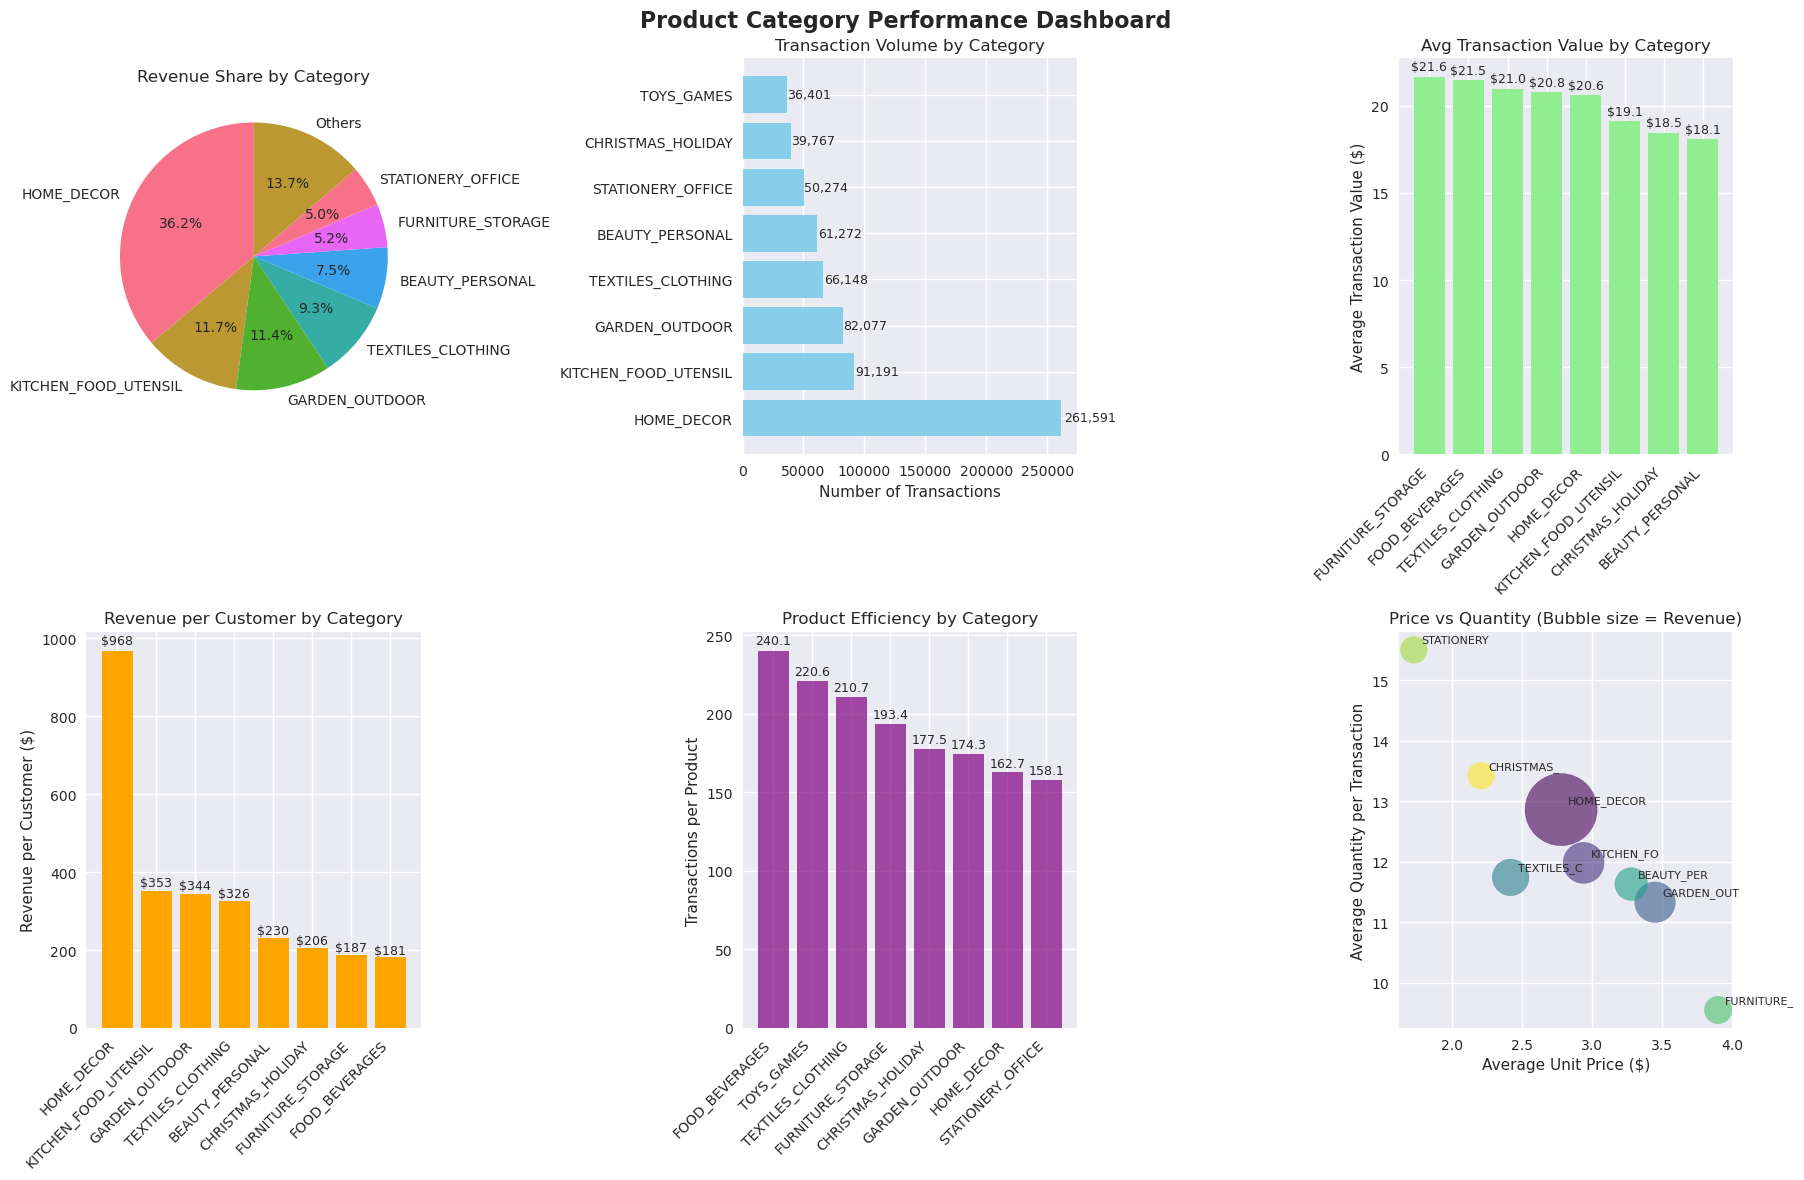

Revenue Leader: HOME_DECOR ($5,387,527, 36.2%)
Volume Leader: HOME_DECOR (261,591 transactions)
Highest AOV: FURNITURE_STORAGE ($21.64 per transaction)
Most Efficient: FOOD_BEVERAGES (240.1 transactions per product)


In [17]:
print("CATEGORY PERFORMANCE ANALYSIS")
print("-" * 50)

# Calculate comprehensive category metrics
category_analysis = df_clean.groupby('product_category').agg({
    'total_amount': ['sum', 'mean', 'count'],
    'quantity': 'mean',
    'unit_price': 'mean',
    'customer_id': 'nunique',
    'product_id': 'nunique'
}).round(2)

# Flatten column names
category_analysis.columns = ['total_revenue', 'avg_transaction_value', 'transaction_count', 
                           'avg_quantity', 'avg_unit_price', 'unique_customers', 'unique_products']

# Calculate additional business metrics
category_analysis['revenue_share'] = (category_analysis['total_revenue'] / category_analysis['total_revenue'].sum() * 100).round(1)
category_analysis['avg_revenue_per_customer'] = (category_analysis['total_revenue'] / category_analysis['unique_customers']).round(2)
category_analysis['transactions_per_product'] = (category_analysis['transaction_count'] / category_analysis['unique_products']).round(1)

# Sort by total revenue
category_analysis = category_analysis.sort_values('total_revenue', ascending=False)

display(category_analysis)

# Create comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Product Category Performance Dashboard', fontsize=16, fontweight='bold')

# 1. Revenue Share (Pie Chart)
top_categories = category_analysis.head(7)
other_revenue = category_analysis.iloc[7:]['total_revenue'].sum()
if other_revenue > 0:
    plot_data = list(top_categories['total_revenue']) + [other_revenue]
    plot_labels = list(top_categories.index) + ['Others']
    
else:
    plot_data = top_categories['total_revenue']
    plot_labels = top_categories.index

wedges, texts, autotexts = axes[0,0].pie(plot_data, labels=plot_labels, autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Revenue Share by Category')

# 2. Transaction Volume (Horizontal Bar)
top_volume = category_analysis.sort_values('transaction_count', ascending=False).head(8)
bars = axes[0,1].barh(range(len(top_volume)), top_volume['transaction_count'], color='skyblue')
axes[0,1].set_yticks(range(len(top_volume)))
axes[0,1].set_yticklabels(top_volume.index)
axes[0,1].set_xlabel('Number of Transactions')
axes[0,1].set_title('Transaction Volume by Category')

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,1].text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
                   f'{int(width):,}', ha='left', va='center', fontsize=9)

# 3. Average Transaction Value
top_aov = category_analysis.sort_values('avg_transaction_value', ascending=False).head(8)
bars = axes[0,2].bar(range(len(top_aov)), top_aov['avg_transaction_value'], color='lightgreen')
axes[0,2].set_xticks(range(len(top_aov)))
axes[0,2].set_xticklabels(top_aov.index, rotation=45, ha='right')
axes[0,2].set_ylabel('Average Transaction Value ($)')
axes[0,2].set_title('Avg Transaction Value by Category')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[0,2].text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                   f'${height:.1f}', ha='center', va='bottom', fontsize=9)

# 4. Revenue per Customer
top_rpc = category_analysis.sort_values('avg_revenue_per_customer', ascending=False).head(8)
bars = axes[1,0].bar(range(len(top_rpc)), top_rpc['avg_revenue_per_customer'], color='orange')
axes[1,0].set_xticks(range(len(top_rpc)))
axes[1,0].set_xticklabels(top_rpc.index, rotation=45, ha='right')
axes[1,0].set_ylabel('Revenue per Customer ($)')
axes[1,0].set_title('Revenue per Customer by Category')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                   f'${height:.0f}', ha='center', va='bottom', fontsize=9)

# 5. Product Efficiency (Transactions per Product)
efficiency = category_analysis.sort_values('transactions_per_product', ascending=False).head(8)
bars = axes[1,1].bar(range(len(efficiency)), efficiency['transactions_per_product'], color='purple', alpha=0.7)
axes[1,1].set_xticks(range(len(efficiency)))
axes[1,1].set_xticklabels(efficiency.index, rotation=45, ha='right')
axes[1,1].set_ylabel('Transactions per Product')
axes[1,1].set_title('Product Efficiency by Category')

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2, height + height*0.01,
                   f'{height:.1f}', ha='center', va='bottom', fontsize=9)

# 6. Price vs Quantity Scatter
scatter_data = category_analysis.head(8)
scatter = axes[1,2].scatter(scatter_data['avg_unit_price'], scatter_data['avg_quantity'], 
                           s=scatter_data['total_revenue']/2000, alpha=0.6, c=range(len(scatter_data)), cmap='viridis')
axes[1,2].set_xlabel('Average Unit Price ($)')
axes[1,2].set_ylabel('Average Quantity per Transaction')
axes[1,2].set_title('Price vs Quantity (Bubble size = Revenue)')

# Add category labels
for i, (idx, row) in enumerate(scatter_data.iterrows()):
    axes[1,2].annotate(idx[:10], (row['avg_unit_price'], row['avg_quantity']), 
                      xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

# Key insights
top_revenue_cat = category_analysis.index[0]
top_volume_cat = category_analysis.sort_values('transaction_count', ascending=False).index[0]
highest_aov_cat = category_analysis.sort_values('avg_transaction_value', ascending=False).index[0]
most_efficient_cat = category_analysis.sort_values('transactions_per_product', ascending=False).index[0]

print(f"Revenue Leader: {top_revenue_cat} (${category_analysis.loc[top_revenue_cat, 'total_revenue']:,.0f}, {category_analysis.loc[top_revenue_cat, 'revenue_share']:.1f}%)")
print(f"Volume Leader: {top_volume_cat} ({category_analysis.loc[top_volume_cat, 'transaction_count']:,} transactions)")
print(f"Highest AOV: {highest_aov_cat} (${category_analysis.loc[highest_aov_cat, 'avg_transaction_value']:.2f} per transaction)")
print(f"Most Efficient: {most_efficient_cat} ({category_analysis.loc[most_efficient_cat, 'transactions_per_product']:.1f} transactions per product)")


1. **Revenue Concentration**
- Home Decor (39.6%) and Kitchen/Food Utensils (20.6%) account for ~60% of total revenue
- Growth heavily dependent on these two key categories

2. **Customer Reach vs Monetization**
- Stationery/Office and Garden/Outdoor attract 4,000+ customers each but generate low revenue per customer (~$200)
- Home Decor shows stronger monetization with ~$1,051 revenue per customer vs Kitchen/Food at $578
- Some categories drive customer acquisition while others build deeper customer value

3. **Product Efficiency** 
- Toys/Games and Textiles/Clothing lead in transactions per product (214-219)
- Home Decor has large assortment (1,700+ SKUs) but lower efficiency (167 transactions/product)
- Opportunity to optimize long-tail product assortment

Revenue is concentrated in Home Decor and Kitchen Food Utensil, but these categories have higher number of unique product (long tail). There is a good opportunity in optimizing the long-tail within dominant categories (Need to do demand forecasting). 

YEAR-OVER-YEAR CATEGORY PERFORMANCE
--------------------------------------------------
Year-over-Year Category Performance (Jan-Nov comparison):


,2010_Revenue,2011_Revenue,Revenue_Growth_%,2010_Orders,2011_Orders,Order_Growth_%,Customer_Growth_%
product_category,,,,,,,
HOME_DECOR,2285927.9,2459789.9,7.6,14218,14190,-0.2,1.1
KITCHEN_FOOD_UTENSIL,752702.0,751413.6,-0.2,10434,9987,-4.3,1.1
GARDEN_OUTDOOR,843505.1,697191.0,-17.3,10990,10210,-7.1,-2.1
TEXTILES_CLOTHING,633712.4,636517.7,0.4,8602,7914,-8.0,-6.7
BEAUTY_PERSONAL,533722.2,428260.3,-19.8,9743,9131,-6.3,-0.4
CHRISTMAS_HOLIDAY,296045.0,349609.8,18.1,4148,4324,4.2,8.2
FURNITURE_STORAGE,355996.0,337361.5,-5.2,7719,6837,-11.4,-4.4
STATIONERY_OFFICE,355294.4,325500.3,-8.4,7960,7637,-4.1,-1.6
TOYS_GAMES,254578.4,303534.2,19.2,6509,6334,-2.7,1.9


CATEGORY WINNERS (>5% growth):
----------------------------------------
TOYS_GAMES: +19.2% revenue growth ($303,534)
CHRISTMAS_HOLIDAY: +18.1% revenue growth ($349,610)
HOME_DECOR: +7.6% revenue growth ($2,459,790)
CATEGORY DECLINERS (<-5% decline):
----------------------------------------
BEAUTY_PERSONAL: -19.8% revenue decline ($428,260)
GARDEN_OUTDOOR: -17.3% revenue decline ($697,191)
FOOD_BEVERAGES: -16.6% revenue decline ($287,811)
STATIONERY_OFFICE: -8.4% revenue decline ($325,500)
FURNITURE_STORAGE: -5.2% revenue decline ($337,362)


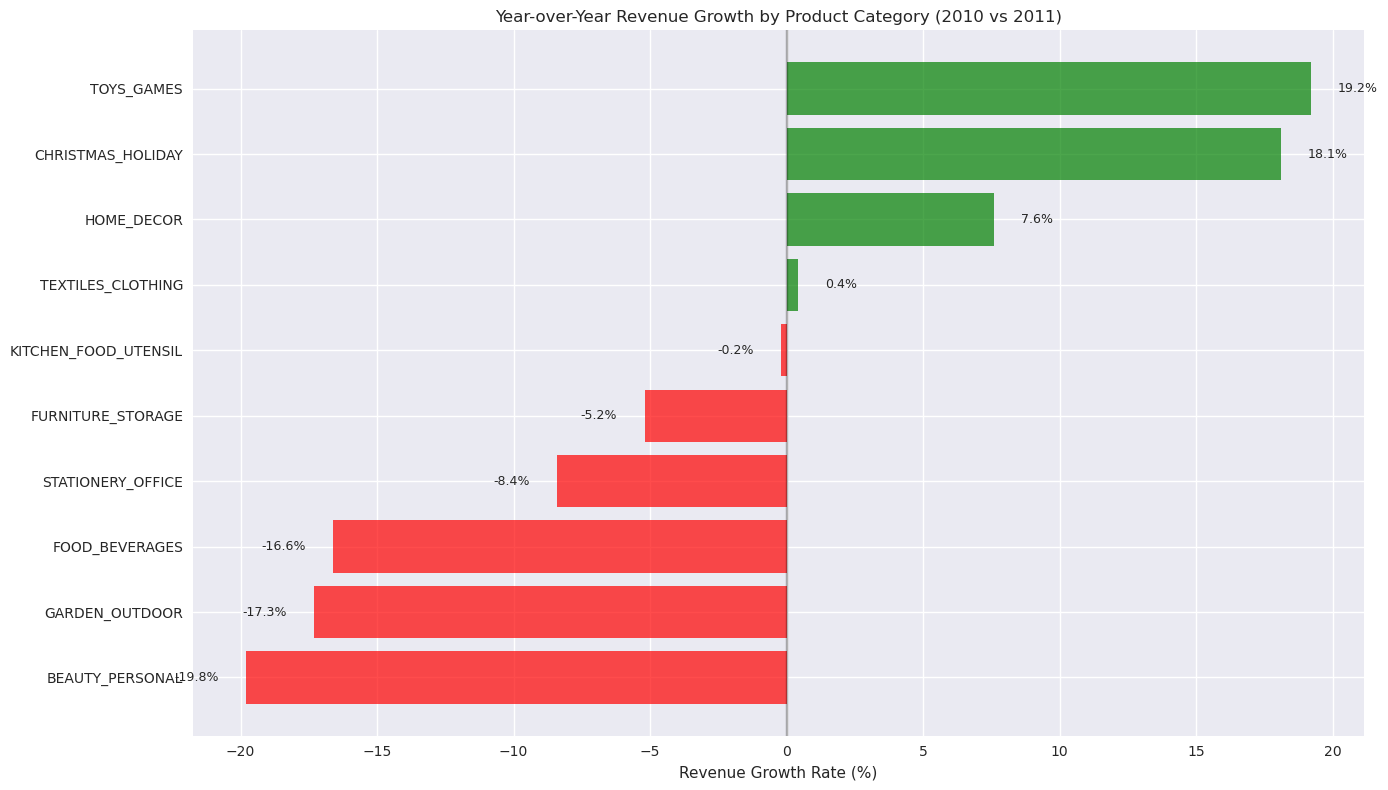

In [18]:
# Year-over-Year Category Performance Analysis
print("YEAR-OVER-YEAR CATEGORY PERFORMANCE")
print("-" * 50)

# Calculate YoY performance by category
df_filtered_yoy = df_clean[(df_clean['month'] >= 1) & (df_clean['month'] <= 11) & (df_clean['year'].isin([2010, 2011]))]

yoy_analysis = df_filtered_yoy.groupby(['year', 'product_category']).agg({
    'total_amount': 'sum',
    'order_id': 'nunique',
    'customer_id': 'nunique'
}).reset_index()

# Pivot to compare years
revenue_comparison = yoy_analysis.pivot(index='product_category', columns='year', values='total_amount').fillna(0)
orders_comparison = yoy_analysis.pivot(index='product_category', columns='year', values='order_id').fillna(0)
customers_comparison = yoy_analysis.pivot(index='product_category', columns='year', values='customer_id').fillna(0)

# Calculate growth rates
revenue_comparison['revenue_growth'] = ((revenue_comparison[2011] - revenue_comparison[2010]) / revenue_comparison[2010] * 100).round(1)
orders_comparison['order_growth'] = ((orders_comparison[2011] - orders_comparison[2010]) / orders_comparison[2010] * 100).round(1)
customers_comparison['customer_growth'] = ((customers_comparison[2011] - customers_comparison[2010]) / customers_comparison[2010] * 100).round(1)

# Combine into summary table
yoy_summary = pd.DataFrame({
    '2010_Revenue': revenue_comparison[2010],
    '2011_Revenue': revenue_comparison[2011],
    'Revenue_Growth_%': revenue_comparison['revenue_growth'],
    '2010_Orders': orders_comparison[2010],
    '2011_Orders': orders_comparison[2011],
    'Order_Growth_%': orders_comparison['order_growth'],
    'Customer_Growth_%': customers_comparison['customer_growth']
}).round(1)

# Sort by 2011 revenue
yoy_summary = yoy_summary.sort_values('2011_Revenue', ascending=False)

print("Year-over-Year Category Performance (Jan-Nov comparison):")
print("=" * 80)
display(yoy_summary)

# Identify winners and losers
winners = yoy_summary[yoy_summary['Revenue_Growth_%'] > 5].sort_values('Revenue_Growth_%', ascending=False)
losers = yoy_summary[yoy_summary['Revenue_Growth_%'] < -5].sort_values('Revenue_Growth_%')

print(f"CATEGORY WINNERS (>5% growth):")
print("-" * 40)
for category, row in winners.iterrows():
    print(f"{category}: +{row['Revenue_Growth_%']:.1f}% revenue growth (${row['2011_Revenue']:,.0f})")

print(f"CATEGORY DECLINERS (<-5% decline):")
print("-" * 40)
for category, row in losers.iterrows():
    print(f"{category}: {row['Revenue_Growth_%']:.1f}% revenue decline (${row['2011_Revenue']:,.0f})")

# Visualize the growth
plt.figure(figsize=(14, 8))
growth_data = yoy_summary.sort_values('Revenue_Growth_%', ascending=True)

# Create color map for positive/negative growth
colors = ['red' if x < 0 else 'green' for x in growth_data['Revenue_Growth_%']]

bars = plt.barh(range(len(growth_data)), growth_data['Revenue_Growth_%'], color=colors, alpha=0.7)
plt.yticks(range(len(growth_data)), growth_data.index)
plt.xlabel('Revenue Growth Rate (%)')
plt.title('Year-over-Year Revenue Growth by Product Category (2010 vs 2011)')
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + (1 if width >= 0 else -1), bar.get_y() + bar.get_height()/2,
            f'{width:.1f}%', ha='left' if width >= 0 else 'right', va='center', fontsize=9)

plt.tight_layout()
plt.show()


1. **Growth Driven by Seasonal & Niche Categories**: 
- Christmas/Holiday (+17.9%), Furniture/Storage (+16.2%), and Toys/Games (+10.1%) led growth. These are seasonal or discretionary categories, suggesting demand spikes rather than sustained growth drivers.

2. **Core Categories Declined** 
- Kitchen/Food Utensils (–7.3%), Stationery/Office (–11.7%), Garden/Outdoor (–12.5%), and Beauty/Personal (–12.8%) all contracted. These categories represent everyday or repeat-purchase items. Their decline is concerning as it weakens the foundation for customer stickiness.

3. **Home Decor Flatlining**: 
The largest revenue category, Home Decor, grew only marginally (+3.2%), underperforming relative to its scale. With 40% of revenue concentrated here, even small slowdowns have an outsized effect on overall performance.

The business is leaning too heavily on seasonal/short-term spikes while core repeat-purchase categories are shrinking. To sustain growth, strategy should focus on: Stabilizing and revitalizing core categories (Kitchen/Food, Beauty, Garden). Using seasonal categories (Christmas, Toys) as acquisition channels, but ensuring those customers are converted into repeat buyers via staple categories.Reinvesting in Home Décor efficiency, since it remains the largest but is losing momentum.

In [19]:
# Long-tail Analysis
print("LONG-TAIL ANALYSIS")
print("-" * 50)

long_tail_share = {}
for year in [2010, 2011]:
    df_year = df_clean[df_clean['year'] == year]
    prod_rev = df_year.groupby('product_id')['total_amount'].sum()
    total_rev = prod_rev.sum()
    long_tail = prod_rev[prod_rev < 0.01 * total_rev].sum() / total_rev
    long_tail_share[year] = long_tail
print("Share of revenue from long-tail products (<1% each):")
print(long_tail_share)

LONG-TAIL ANALYSIS
--------------------------------------------------
Share of revenue from long-tail products (<1% each):
{2010: np.float64(0.987260867194639), 2011: np.float64(1.0)}


In 2010, ~98.7% of revenue came from products contributing <1% each, and by 2011 this rose to nearly 100%. This means virtually no single product carries significant weight on its own revenue is spread across a vast assortment.

In [20]:
# Compare First Purchase Patterns - Products & Categories
print("Comparing First Purchase Patterns between Loyal and Churned customers")
print("-" * 50)

# Create first purchase segmented table by getting the first date for each customer
first_purchase_dates = df_clean.groupby('customer_id')['order_date'].min().reset_index()

# Get all purchases made on each customer's first purchase date
first_purchases = df_clean.merge(
    first_purchase_dates,
    on=['customer_id', 'order_date'],
    how='inner'
)

# Add customer segmentation based on purchase frequency
customer_segments = df_clean.groupby('customer_id').agg({
    'order_id': 'nunique'  # Changed count to nunique to count unique orders
}).reset_index()

# Order Frequency Segments
customer_segments['customer_segment'] = pd.cut(
    customer_segments['order_id'],
    bins=[0, 1, 3, float('inf')],
    labels=['One-time', 'Occasional', 'Loyal'],
    right=True
)

# Merge segments with first purchases
first_purchases_segmented = first_purchases.merge(
    customer_segments[['customer_id', 'customer_segment']], 
    on='customer_id',
    how='left'
)

# Focus on Loyal vs Churned comparison (exclude Occasional for clarity)
loyal_first_purchases = first_purchases_segmented[first_purchases_segmented['customer_segment'] == 'Loyal']
churned_first_purchases = first_purchases_segmented[first_purchases_segmented['customer_segment'] == 'One-time']

# Calculate category frequencies for each segment, counting each category once per customer
loyal_categories = loyal_first_purchases.groupby('customer_id')['product_category'].value_counts().reset_index()
loyal_categories = loyal_categories.groupby('product_category').size() / len(loyal_first_purchases['customer_id'].unique()) * 100

churned_categories = churned_first_purchases.groupby('customer_id')['product_category'].value_counts().reset_index()
churned_categories = churned_categories.groupby('product_category').size() / len(churned_first_purchases['customer_id'].unique()) * 100

# Combine into comparison dataframe
category_comparison = pd.DataFrame({
    'Loyal_%': loyal_categories,
    'Churned_%': churned_categories
}).fillna(0).round(1)

# Calculate difference (Loyal - Churned)
category_comparison['Difference_%'] = category_comparison['Loyal_%'] - category_comparison['Churned_%']
category_comparison = category_comparison.sort_values('Difference_%', ascending=False)

# Calculate retention rate for each category
category_retention = []
for category in first_purchases_segmented['product_category'].unique():
    # Get unique customers who purchased this category in their first purchase
    category_customers = first_purchases_segmented[first_purchases_segmented['product_category'] == category]['customer_id'].unique()
    category_data = first_purchases_segmented[first_purchases_segmented['customer_id'].isin(category_customers)]
    
    total_customers = len(category_customers)
    loyal_customers = len(category_data[category_data['customer_segment'] == 'Loyal']['customer_id'].unique())
    churned_customers = len(category_data[category_data['customer_segment'] == 'One-time']['customer_id'].unique())
    occasional_customers = len(category_data[category_data['customer_segment'] == 'Occasional']['customer_id'].unique())
    
    loyal_rate = (loyal_customers / total_customers) * 100
    retention_rate = ((loyal_customers + occasional_customers) / total_customers) * 100  # Non-churned rate
    
    category_retention.append({
        'Category': category,
        'Total_Customers': total_customers,
        'Loyal_Rate_%': round(loyal_rate, 1),
        'Retention_Rate_%': round(retention_rate, 1),
    })

retention_df = pd.DataFrame(category_retention).sort_values('Retention_Rate_%', ascending=False)
retention_df


Comparing First Purchase Patterns between Loyal and Churned customers
--------------------------------------------------


,Category,Total_Customers,Loyal_Rate_%,Retention_Rate_%
8,TEXTILES_CLOTHING,3234,46.8,74.3
4,GARDEN_OUTDOOR,4229,46.3,74.3
9,FOOD_BEVERAGES,2616,45.9,74.2
1,BEAUTY_PERSONAL,3902,46.4,74.0
3,FURNITURE_STORAGE,2971,46.9,74.0
5,KITCHEN_FOOD_UTENSIL,4122,46.2,73.6
6,STATIONERY_OFFICE,3194,44.9,73.3
7,TOYS_GAMES,2554,45.0,73.3
2,HOME_DECOR,5330,45.2,73.1
0,CHRISTMAS_HOLIDAY,1752,41.3,70.1


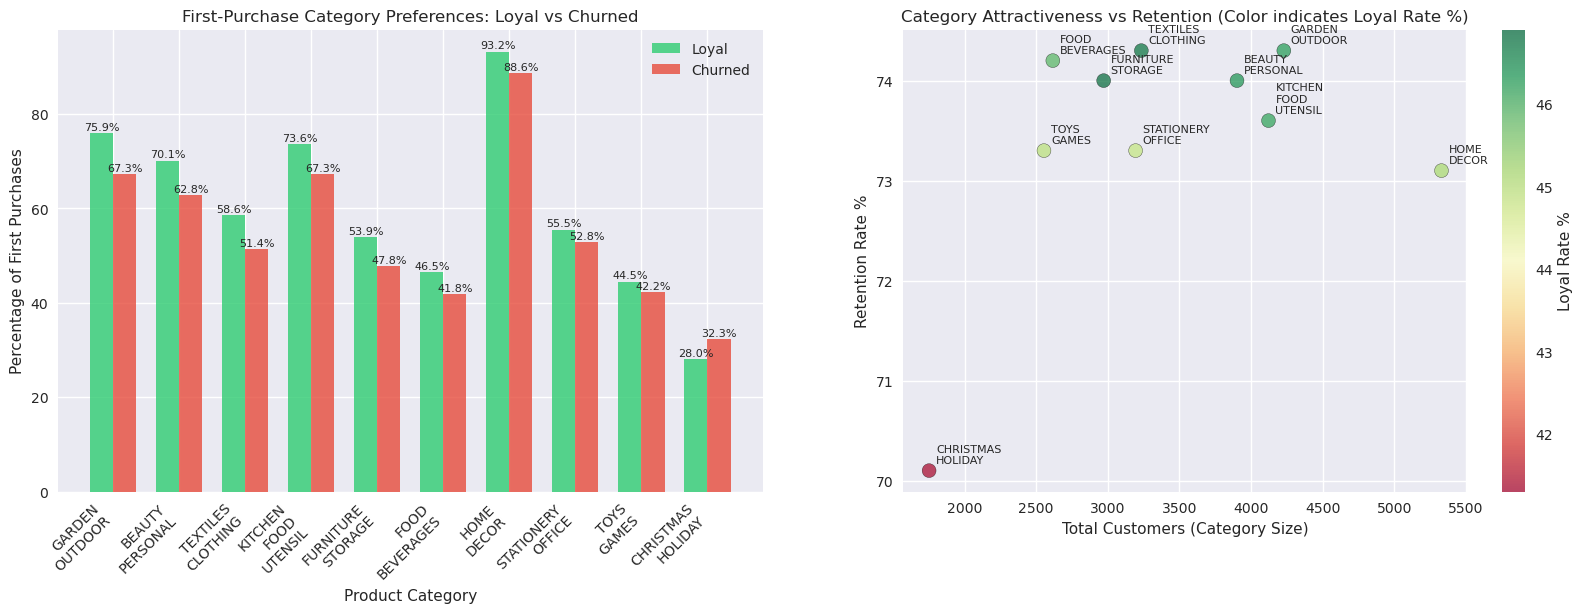

In [21]:
# Create comprehensive dashboard
fig = plt.figure(figsize=(20, 6))

# 1. First-Purchase Category Preferences
plt.subplot(1, 2, 1)
categories = category_comparison.index[:10]
loyal_pct = category_comparison.loc[categories, 'Loyal_%'].values
churned_pct = category_comparison.loc[categories, 'Churned_%'].values

x_pos = np.arange(len(categories))
width = 0.35  # Define width since it was used but not defined
bars1 = plt.bar(x_pos - width/2, loyal_pct, width, label='Loyal', color='#2ecc71', alpha=0.8)
bars2 = plt.bar(x_pos + width/2, churned_pct, width, label='Churned', color='#e74c3c', alpha=0.8)

plt.xlabel('Product Category')
plt.ylabel('Percentage of First Purchases')
plt.title('First-Purchase Category Preferences: Loyal vs Churned')
plt.xticks(x_pos, [cat.replace('_', '\n') for cat in categories], rotation=45, ha='right')
plt.legend()

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=8)

# 2. Scatter plot: Category attractiveness vs retention
plt.subplot(1, 2, 2)
scatter_data = retention_df.copy()  # Use retention_df from previous analysis
scatter_data = scatter_data[scatter_data['Total_Customers'] >= 50]  # Filter for statistical significance

plt.scatter(scatter_data['Total_Customers'], 
           scatter_data['Retention_Rate_%'],
           c=scatter_data['Loyal_Rate_%'], 
           s=100, 
           alpha=0.7,
           cmap='RdYlGn',
           edgecolors='black')

plt.colorbar(label='Loyal Rate %')

# Add category labels
for _, row in scatter_data.iterrows():
    plt.annotate(row['Category'].replace('_', '\n'),
                (row['Total_Customers'], row['Retention_Rate_%']),
                xytext=(5, 5), 
                textcoords='offset points',
                fontsize=8)
    

plt.xlabel('Total Customers (Category Size)')
plt.ylabel('Retention Rate %') 
plt.title('Category Attractiveness vs Retention (Color indicates Loyal Rate %)')

plt.show()


1. **Kitchen/Food and Beauty/Personal Anchor Loyalty**
- Both categories show high first-purchase share among loyal customers (Kitchen/Food 86%, Beauty 73%). These are strong entry points that convert well into repeat buyers, making them effective categories for stickiness campaigns.

2. **Home Decor = Biggest Funnel, Average Conversion to Loyal**
Largest acquisition category (95% of churners, 90% of loyals started here). However, loyal rate is only ~45%. Home Décor is an excellent acquisition magnet, but needs cross-sell into stickier categories to improve retention.

3. **Seasonal / Gift Categories Underperform** 
Christmas/Holiday has the lowest loyalty rate (41.5%) and weakest retention (~71%). Good for customer acquisition spikes, but not effective for repeat conversion unless paired with follow-up engagement.

Repeat-conversion is anchored by Kitchen/Food and Beauty, customers starting here are more likely to become loyal. Home Decor dominates acquisition but underconverts, needs cross-sell into sticky categories to retain customers. Seasonal categories (Christmas, Toys) are churn-heavy and best used for acquisition funnels, not as loyalty drivers.

# Seasonality & Demand Alignment

Understanding sales seasonality is essential for aligning inventory and marketing with demand. This section analyzes monthly sales trends, year-on-year seasonality, and applies rolling averages to reveal underlying patterns.

MONTHLY SALES TREND
--------------------------------------------------


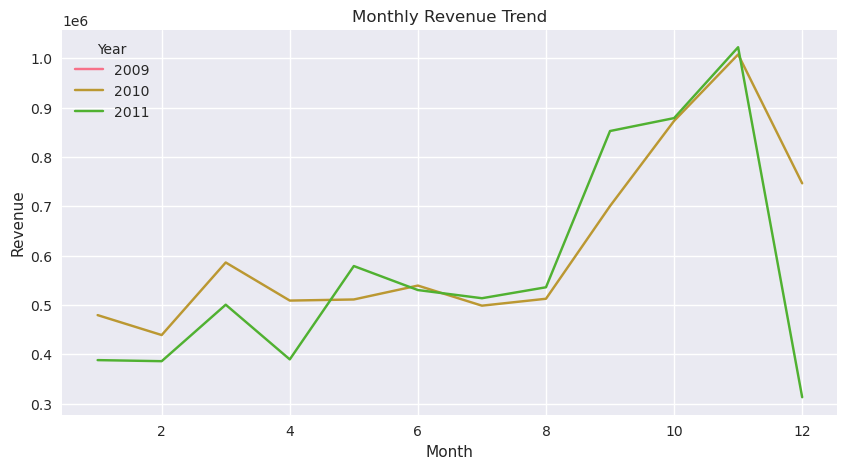

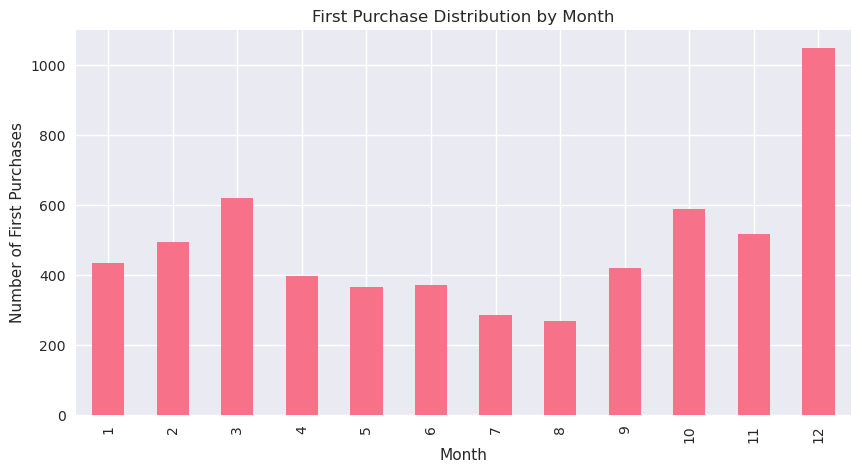

In [22]:
# Monthly Sales Trend
print("MONTHLY SALES TREND")
print("-" * 50)

monthly_sales = df_clean.groupby(['year', 'month'])['total_amount'].sum().unstack(0)
plt.figure(figsize=(10,5))
monthly_sales.plot(ax=plt.gca())
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend(title='Year')
plt.show()

# take month from order_date
first_purchase_dates['month'] = first_purchase_dates['order_date'].dt.month

# visualize first_purchase_dates
plt.figure(figsize=(10,5))
first_purchase_dates.groupby('month').size().plot(kind='bar')
plt.title('First Purchase Distribution by Month')
plt.xlabel('Month') 
plt.ylabel('Number of First Purchases')
plt.show()



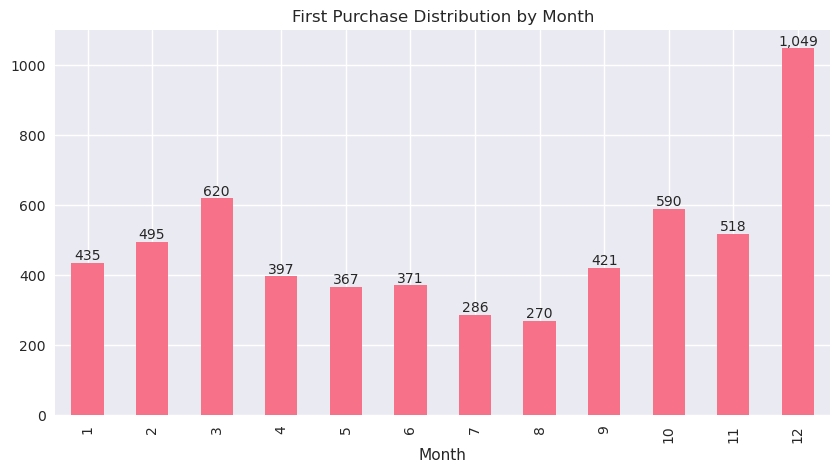

In [27]:
# visualize first_purchase_dates
plt.figure(figsize=(10,5))
first_purchase_dates.groupby('month').size().plot(kind='bar')
# data label
for i, v in enumerate(first_purchase_dates.groupby('month').size()):
    plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title('First Purchase Distribution by Month')
plt.xlabel('Month') 
# plt.ylabel('Number of First Purchases')
plt.show()

Revenue growth is concentrated in holiday months, but acquisition surges in December aren’t translating into long-term loyalty. To stabilize growth, the business needs to activate mid-year demand and convert seasonal shoppers into repeat buyers through targeted retention campaigns (e.g., nudging December buyers to return in Q1/Q2 with bundles or promotions).

MONTHLY REVENUE TREND BY PRODUCT CATEGORY
--------------------------------------------------


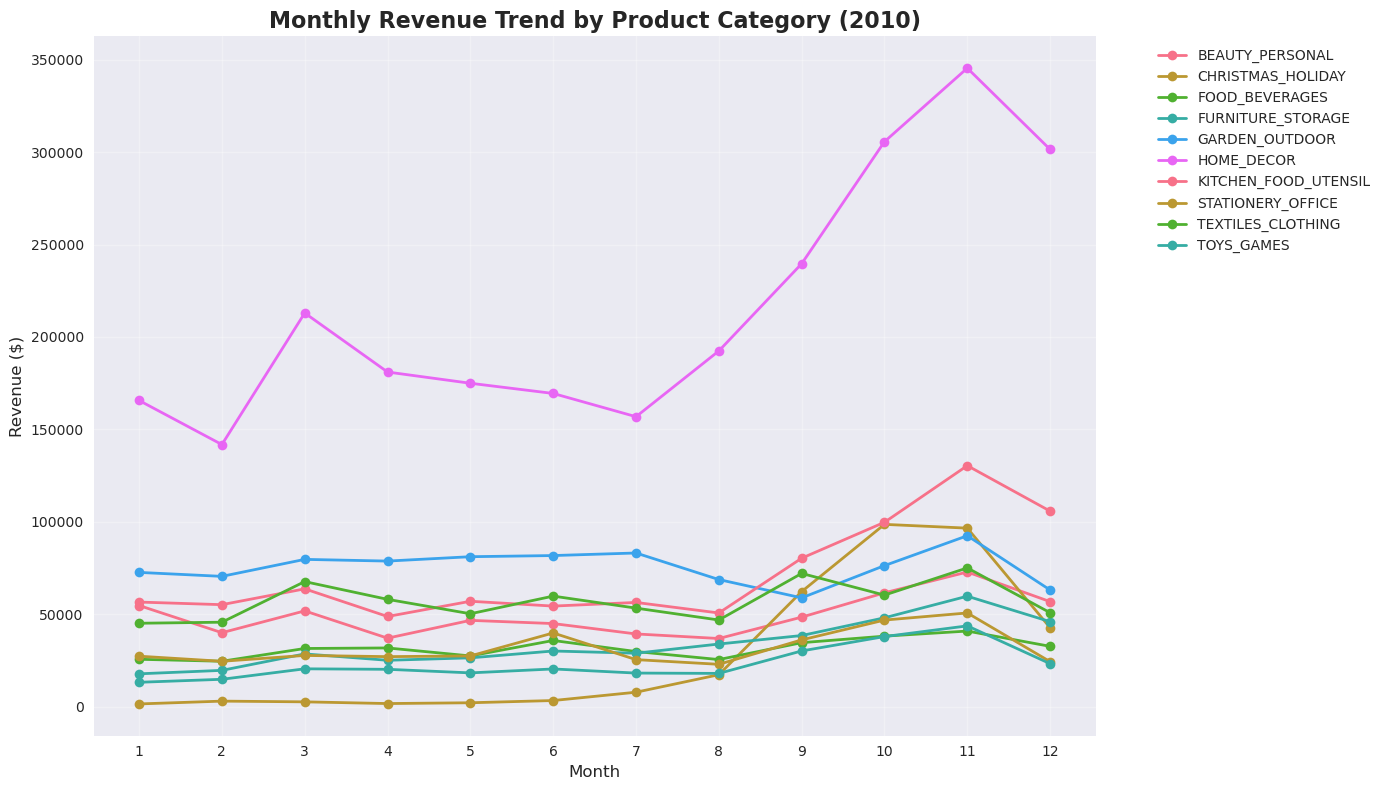

In [23]:
# Monthly Revenue Trend by Product Category
print("MONTHLY REVENUE TREND BY PRODUCT CATEGORY")
print("-" * 50)

# Filter data for 2010 only
df_2010 = df_clean[df_clean['year'] == 2010]

# Create monthly revenue data by product category for 2010
monthly_category_sales = df_2010.groupby(['month', 'product_category'])['total_amount'].sum().unstack(fill_value=0)

# Create the visualization
plt.figure(figsize=(14, 8))
for category in monthly_category_sales.columns:
    plt.plot(monthly_category_sales.index, monthly_category_sales[category], 
             marker='o', linewidth=2, label=category)

plt.title('Monthly Revenue Trend by Product Category (2010)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


- Home Decor is the backbone category, with a steady rise throughout the year and a sharp acceleration from September to November. It peaks in November (~$800k), driving overall revenue performance.

- Christmas Holiday category has a clear seasonal spike in Q4 (Oct–Dec), peaking in November (~$200k), but contributes very little outside the holiday period.

SEASONALITY INDEX ANALYSIS BY CATEGORY
--------------------------------------------------


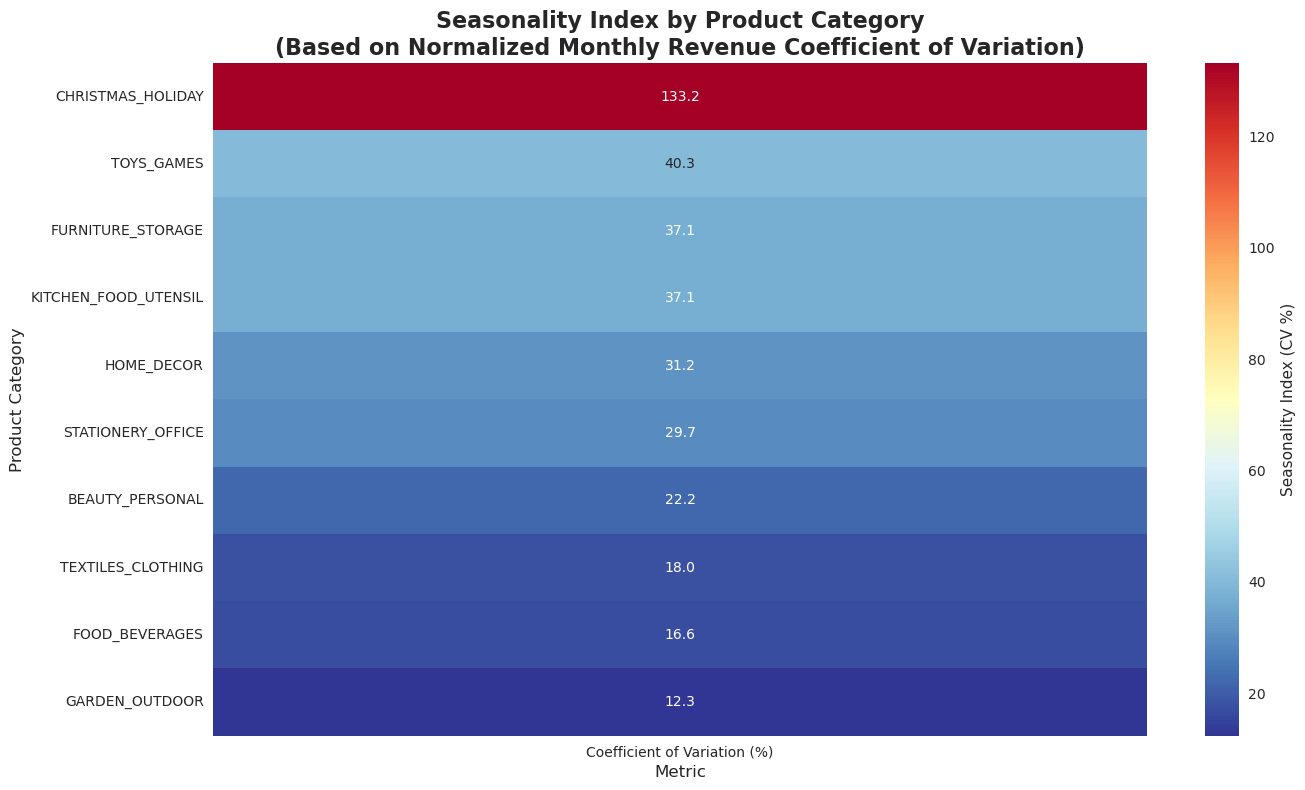

In [24]:
# Seasonality Index Analysis using Coefficient of Variation
print("SEASONALITY INDEX ANALYSIS BY CATEGORY")
print("-" * 50)

# filter data for 2010 only
df_2010 = df_clean[df_clean['year'] == 2010]

# Calculate seasonality index for each category using CV
seasonality_data = []
categories = df_2010['product_category'].unique()

for category in categories:
    category_data = df_2010[df_2010['product_category'] == category]
    monthly_revenue = category_data.groupby('month')['total_amount'].sum()
    
    # Normalize monthly revenue (divide by total annual revenue for the category)
    normalized_monthly_revenue = monthly_revenue / monthly_revenue.sum()
    
    # Seasonality index (coefficient of variation on normalized values)
    cv = (normalized_monthly_revenue.std() / normalized_monthly_revenue.mean()) * 100
    
    seasonality_data.append({
        'Category': category,
        'CV': cv
    })

seasonality_df = pd.DataFrame(seasonality_data)

# Sort by CV for better visualization
seasonality_df = seasonality_df.sort_values('CV', ascending=False)

# Create heatmap visualization (1D since we have one CV value per category)
plt.figure(figsize=(14, 8))
cv_matrix = seasonality_df['CV'].values.reshape(-1, 1)

sns.heatmap(cv_matrix, 
            annot=True, 
            fmt='.1f', 
            cmap='RdYlBu_r',
            yticklabels=seasonality_df['Category'],
            xticklabels=['Coefficient of Variation (%)'],
            cbar_kws={'label': 'Seasonality Index (CV %)'})

plt.title('Seasonality Index by Product Category\n(Based on Normalized Monthly Revenue Coefficient of Variation)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()


1. **Christmas Holiday dominates seasonality.** 
- CV = 133%, far above all other categories. This confirms the category is highly seasonal, almost entirely dependent on Q4 sales. It’s a short-lived revenue booster, not a stable contributor.

2. **Moderate volatility categories: Furniture & Toys**
- Likely tied to gift-giving or occasional big-ticket purchases. These categories need timed promotions and controlled inventory, since demand isn’t spread evenly through the year.

3. **Stable base categories: Home Decor, Beauty, Kitchen, Garden, Textiles, Stationery** 
- Ranging between 18%–31% CV, these categories are far more predictable, making them reliable for steady cash flow. Home Decor (30.5%) shows some uplift in Q4 but remains a year-round anchor.ow.

Seasonality is highly uneven across categories. While Christmas drives short bursts of sales, most core categories (Home Decor, Kitchen, Textiles, Garden, Stationery) show steady demand throughout the year. To optimize, the business should treat Christmas as a tactical spike category while ensuring baseline growth comes from the stable, everyday categories

# Country Context

While the country distribution is heavily skewed toward the UK, it is useful to review revenue share by country for completeness.

REVENUE SHARE BY COUNTRY (TOP 10)
--------------------------------------------------


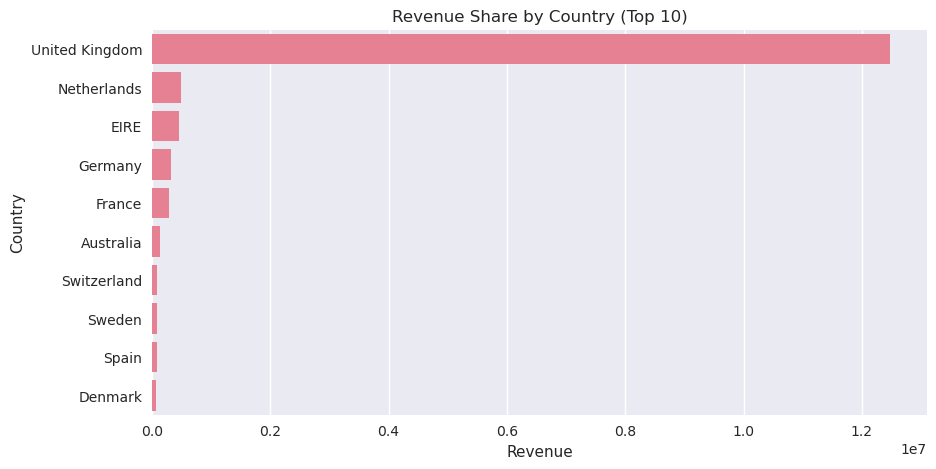

In [25]:
# Revenue Share by Country (Top 10)
print("REVENUE SHARE BY COUNTRY (TOP 10)")
print("-" * 50)

country_rev = df_clean.groupby('country')['total_amount'].sum().sort_values(ascending=False)
top_countries = country_rev.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Revenue Share by Country (Top 10)')
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.show()

The UK overwhelmingly dominates revenue, with other countries contributing marginally. While international expansion is limited, the UK market remains the primary focus for growth and retention strategies.

# **Summary**

* **Revenue performance has stalled**: Sales plateaued in 2011 (**–1.2% YoY**) despite slightly higher order values. The underlying issue is not basket size, but **lack of net customer growth** and weakening repeat engagement.
* **Customer base is leaky**: Acquisition was strong (**37% new customers in 2011**), but almost entirely offset by churn (**37% lost from 2010**). Retention is weak, only **63% of customers were retained YoY**. Loyal customers (44% of base) drive nearly **88% of revenue**, highlighting over-reliance on a small group. Most new buyers churn after their first purchase.
* **Product mix is skewed**: Revenue is highly concentrated in **Home Decor and Kitchen/Food (\~60%)**, but overall product variety shrank (**–7.9% fewer SKUs**). Core categories like Kitchen, Beauty, and Garden declined YoY, while seasonal categories (Christmas, Toys) grew but do not sustain repeat purchases. The assortment is long-tailed, with **\~100% of revenue from products contributing <1% each**, making SKU efficiency a concern.
* **Repeat-conversion depends on product type**: Customers starting with **Kitchen/Food or Beauty** are more likely to become loyal, while those entering via **Christmas/Holiday** or novelty categories churn at higher rates. Home Décor remains the biggest acquisition funnel but underconverts without cross-sell into stickier categories.
* **Sales are highly seasonal**: Revenue spikes in **Q4, especially November**, driven by Home Décor and Christmas items. Seasonality index confirms Christmas as extremely volatile (>130% CV), while staples like Kitchen, Garden, and Stationery remain stable year-round. Seasonal peaks bring customer surges but do not translate into loyalty.
* **Geographic footprint is narrow**: Sales are dominated by the UK, with minimal contribution from international markets. Expansion potential exists, but only after strengthening retention and product performance at home.

# **Recommendations**

1. **Strengthen Retention & Engagement**

   * Convert one-time buyers into repeat customers with onboarding and reactivation campaigns right after first purchase.
   * Protect high-value loyal customers through loyalty programs and personalized offers.
   * Develop a **Customer 360 view** to unify customer data, enabling better targeting of at-risk customers and improving lifetime value forecasts.

2. **Rebalance Product Strategy**
   * Prioritize Home Decor as the anchor category: it contributes ~40% of revenue and is the largest customer entry funnel. Focus on improving its conversion by bundling or cross-selling into stickier categories like Kitchen/Food and Beauty.
   * Revitalize shrinking core categories (Kitchen, Beauty, Garden, Stationery) to build stable demand.
   * Use seasonal categories (Christmas, Toys) as **acquisition funnels**, but cross-sell into staples to retain customers.
   * Optimize the long-tail by pruning weak SKUs while elevating “hidden hero” products with high repeat potential.

3. **Align to Seasonality & Demand**

   * Treat Christmas as a tactical spike, but plan campaigns to smooth demand into mid-year months.
   * Consistently stock Home Decor and Kitchen/Food year-round as anchor categories.
   * Build a **demand forecasting capability** (using historical sales trends) to anticipate peaks and troughs, aligning marketing and inventory to capture upside and avoid waste.

4. **Geographic Focus**

   * Deepen engagement in the UK where scale is strongest.
   * Revisit international expansion once retention and product efficiency are stabilized.

In [26]:
df_clean.to_csv('datasets/retail_transaction_data_clean.csv', index=False)